In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('final_vk_youtube_dataset.xlsx')
df.columns = df.columns.str.strip()


In [24]:
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nТипы данных:")
print(df.dtypes)
df.head()


Размер датасета: 3947 строк, 48 столбцов

Типы данных:
video_id                           int64
owner_id                           int64
title                             object
description                       object
duration                           int64
views                              int64
likes                              int64
comments                           int64
reposts                            int64
date                               int64
date_published                    object
image                             object
first_frame                       object
width                              int64
height                             int64
player                            object
access_key                       float64
platform                          object
search_query                      object
category                          object
engagement_rate                  float64
duration_minutes                 float64
comments_per_1k_views            float64
vi

,video_id,owner_id,title,description,duration,views,likes,comments,reposts,date,...,player_youtube,access_key_youtube,platform_youtube,search_query_youtube,category_youtube,engagement_rate_youtube,duration_minutes_youtube,comments_per_1k_views_youtube,youtube_category_id,youtube_category_name
0,456241882,-229890363,Медведев о том как Трамп только что объявил во...,NaN,933,0,0,0,0,1761702515,...,https://www.youtube.com/watch?v=IjKP-FjPQXI,NaN,YouTube,медведев о трампе,Политика,NaN,NaN,NaN,22,People & Blogs
1,456331585,-222783128,"Russ Millions, Dopebwoy - IShowSpeed (Instrume...","🎧Enjoy this playlist ""Radar Weekly Instrumenta...",115,0,0,0,0,1761921999,...,https://www.youtube.com/watch?v=YcScm3p76f8,NaN,YouTube,IShowSpeed 2025,Развлечения,NaN,NaN,NaN,10,Music
2,456270419,-226695215,15 ФАНТАСТИЧЕСКИХ фильмов где ЭКСПЕРИМЕНТЫ ВЫХ...,Автор видео: Дали\n\nПо вопросам публикации и ...,1550,1,0,0,0,1762084930,...,https://www.youtube.com/watch?v=DKYqmEOloZs,NaN,YouTube,видео эксперименты 2025,Развлечения,NaN,NaN,NaN,1,Film & Animation
3,456243825,-230654283,"Corsair Air 540 & 330R Cases, Vengeance Pro RA...",Corsair showed off a TON of new products. I wa...,786,1,0,0,0,1748899846,...,https://www.youtube.com/watch?v=b6C9XvWcfRQ,NaN,YouTube,Corsair,Технологии,NaN,NaN,NaN,28,Science & Technology
4,457093896,-228247228,ТУТОРИАЛ КАК ПРОЙТИ A-1000 ДВЕРЕЙ И ПОЛУЧИТЬ С...,ТУТОРИАЛ КАК ПРОЙТИ A-1000 ДВЕРЕЙ И ПОЛУЧИТЬ С...,125,1,0,0,0,1757241227,...,https://www.youtube.com/watch?v=K-fGiX-73mg,NaN,YouTube,туториал,Туториалы,NaN,NaN,NaN,20,Gaming


Пропущенные значения:
                               Пропущено     Процент
access_key                          3947  100.000000
reposts_youtube                     3947  100.000000
date_youtube                        3947  100.000000
owner_id_youtube                    3947  100.000000
access_key_youtube                  3947  100.000000
engagement_rate_youtube             3947  100.000000
duration_minutes_youtube            3947  100.000000
comments_youtube                    3947  100.000000
height_youtube                      3947  100.000000
width_youtube                       3947  100.000000
first_frame_youtube                 3947  100.000000
image_youtube                       3947  100.000000
comments_per_1k_views_youtube       3947  100.000000
description                          947   23.992906
description_youtube                  377    9.551558
likes_youtube                        125    3.166962
title_youtube                          2    0.050671
views_youtube           

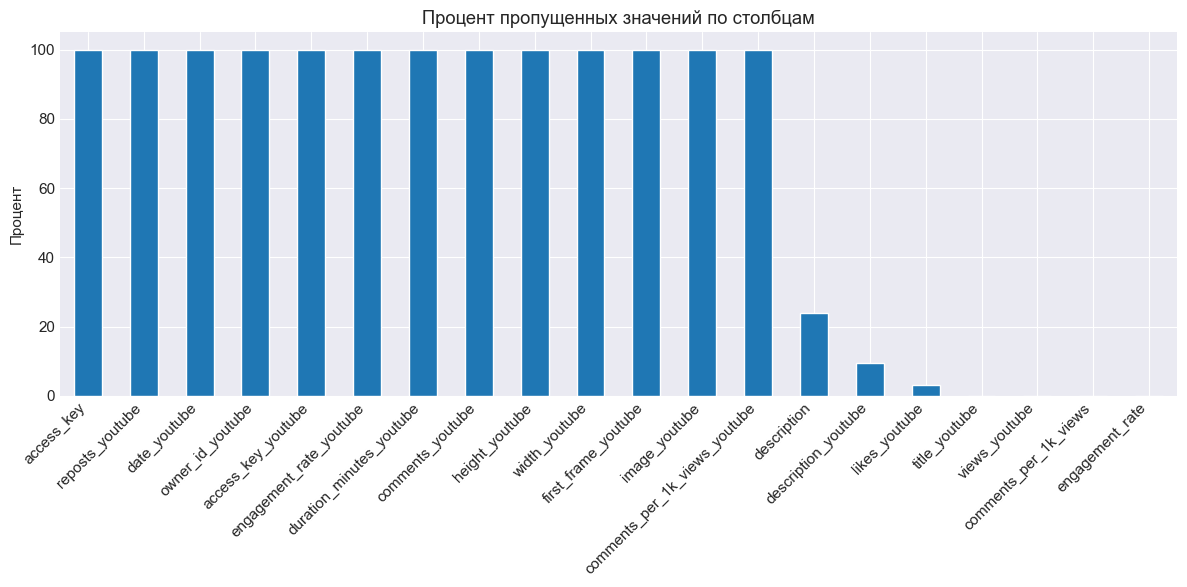

In [25]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Пропущено': missing, 'Процент': missing_pct})
missing_df = missing_df[missing_df['Пропущено'] > 0].sort_values('Пропущено', ascending=False)
print("Пропущенные значения:")
print(missing_df)

plt.figure(figsize=(12, 6))
missing_df['Процент'].plot(kind='bar')
plt.title('Процент пропущенных значений по столбцам')
plt.ylabel('Процент')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Описательная статистика числовых признаков:")
df[numeric_cols].describe()


Описательная статистика числовых признаков:


,video_id,owner_id,duration,views,likes,comments,reposts,date,width,height,...,date_youtube,image_youtube,first_frame_youtube,width_youtube,height_youtube,access_key_youtube,engagement_rate_youtube,duration_minutes_youtube,comments_per_1k_views_youtube,youtube_category_id
count,3.947000e+03,3.947000e+03,3947.000000,3.947000e+03,3947.000000,3947.000000,3947.000000,3.947000e+03,3947.000000,3947.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3947.000000
mean,4.266156e+08,-9.197703e+07,1963.758551,1.990225e+05,1569.731948,107.115024,152.569800,1.684540e+09,1861.526729,1052.142387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.513301
std,8.785659e+07,1.335942e+08,3136.155596,1.114412e+06,7023.819581,627.695012,1124.967727,1.132346e+08,865.801517,475.338890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.148346
min,7.314417e+07,-2.000955e+09,8.000000,0.000000e+00,0.000000,0.000000,0.000000,1.220805e+09,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,4.562406e+08,-1.824114e+08,337.000000,8.345000e+02,5.000000,0.000000,1.000000,1.675694e+09,1280.000000,720.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
50%,4.562440e+08,-9.019912e+07,966.000000,5.924000e+03,47.000000,1.000000,6.000000,1.736494e+09,1920.000000,1080.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
75%,4.562521e+08,-3.456315e+07,2264.500000,4.359000e+04,353.000000,13.000000,41.000000,1.756928e+09,1920.000000,1080.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000
max,4.571730e+08,8.600806e+08,49687.000000,3.542360e+07,119332.000000,16239.000000,48779.000000,1.762611e+09,3840.000000,3840.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000


In [27]:
errors = []
if 'views' in df.columns:
    negative_views = (df['views'] < 0).sum()
    if negative_views > 0:
        errors.append(f'Отрицательные просмотры VK: {negative_views}')
if 'views_youtube' in df.columns:
    negative_views_yt = (df['views_youtube'] < 0).sum()
    if negative_views_yt > 0:
        errors.append(f'Отрицательные просмотры YouTube: {negative_views_yt}')
if 'likes' in df.columns:
    negative_likes = (df['likes'] < 0).sum()
    if negative_likes > 0:
        errors.append(f'Отрицательные лайки VK: {negative_likes}')
if 'likes_youtube' in df.columns:
    negative_likes_yt = (df['likes_youtube'] < 0).sum()
    if negative_likes_yt > 0:
        errors.append(f'Отрицательные лайки YouTube: {negative_likes_yt}')

if errors:
    print("Найдены ошибочные значения:")
    for e in errors:
        print(e)
else:
    print("Ошибочных значений не найдено")


Ошибочных значений не найдено


Сводная таблица по категориям:
                                mean               count              
                               views views_youtube views views_youtube
youtube_category_name                                                 
Autos & Vehicles        34707.731707  2.813434e+05   164           164
Comedy                 858327.563953  3.060997e+06   172           172
Education               17235.286275  2.707749e+05   255           255
Entertainment          714257.169576  1.081045e+07   401           401
Film & Animation        66210.000000  1.333173e+06   126           126
Gaming                 116055.336207  1.781452e+06   464           464
Howto & Style           45927.515385  1.038046e+06   130           130
Music                  229654.995604  1.464643e+08   455           453
News & Politics         30992.075676  9.124420e+04   185           185
Nonprofits & Activism   28129.375000  4.193219e+05    40            40
People & Blogs         125093.677326  1.464574

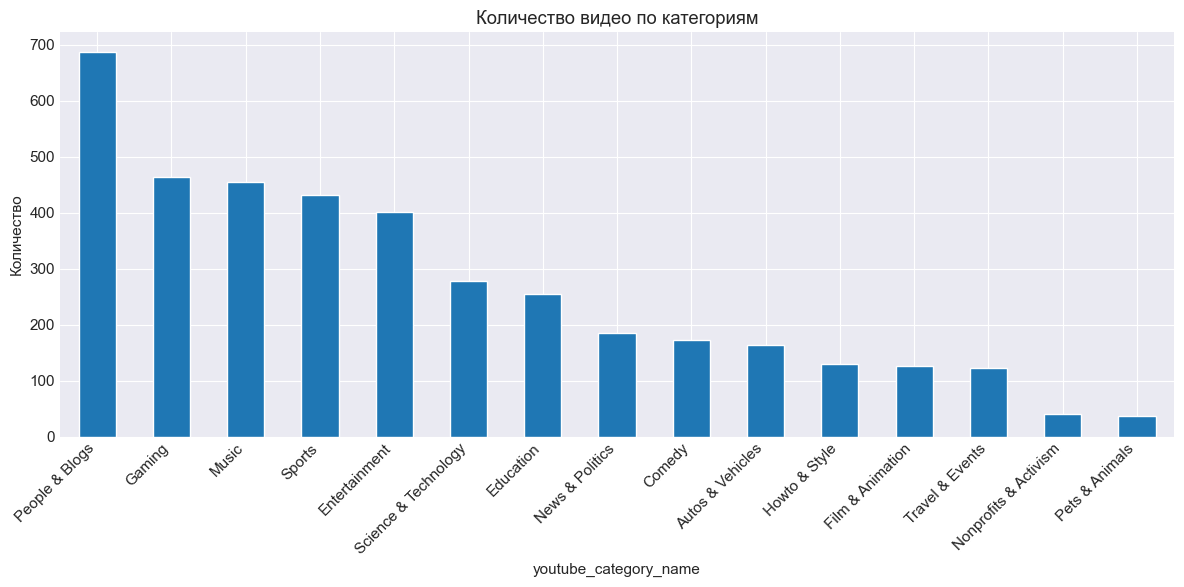

In [28]:
if 'youtube_category_name' in df.columns:
    pivot = pd.pivot_table(df, 
                           values=['views', 'views_youtube'], 
                           index='youtube_category_name', 
                           aggfunc=['mean', 'count'])
    print("Сводная таблица по категориям:")
    print(pivot)
    
    plt.figure(figsize=(12, 6))
    category_counts = df['youtube_category_name'].value_counts()
    category_counts.plot(kind='bar')
    plt.title('Количество видео по категориям')
    plt.ylabel('Количество')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [30]:
print("Выводы EDA:")
print(f"1. Всего записей: {len(df)}")
print(f"2. Всего признаков: {len(df.columns)}")
print(f"3. Пропущенных значений: {df.isnull().sum().sum()}")
print(f"4. Процент пропусков: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")

if 'youtube_category_name' in df.columns:
    print(f"5. Количество категорий: {df['youtube_category_name'].nunique()}")

if 'views' in df.columns and 'views_youtube' in df.columns:
    print(f"6. Средние просмотры VK: {df['views'].mean():.0f}")
    print(f"7. Средние просмотры YouTube: {df['views_youtube'].mean():.0f}")

if 'likes' in df.columns and 'likes_youtube' in df.columns:
    print(f"8. Средние лайки VK: {df['likes'].mean():.0f}")
    print(f"9. Средние лайки YouTube: {df['likes_youtube'].mean():.0f}")


Выводы EDA:
1. Всего записей: 3947
2. Всего признаков: 48
3. Пропущенных значений: 52766
4. Процент пропусков: 27.85%
5. Количество категорий: 15
6. Средние просмотры VK: 199023
7. Средние просмотры YouTube: 18742731
8. Средние лайки VK: 1570
9. Средние лайки YouTube: 172234


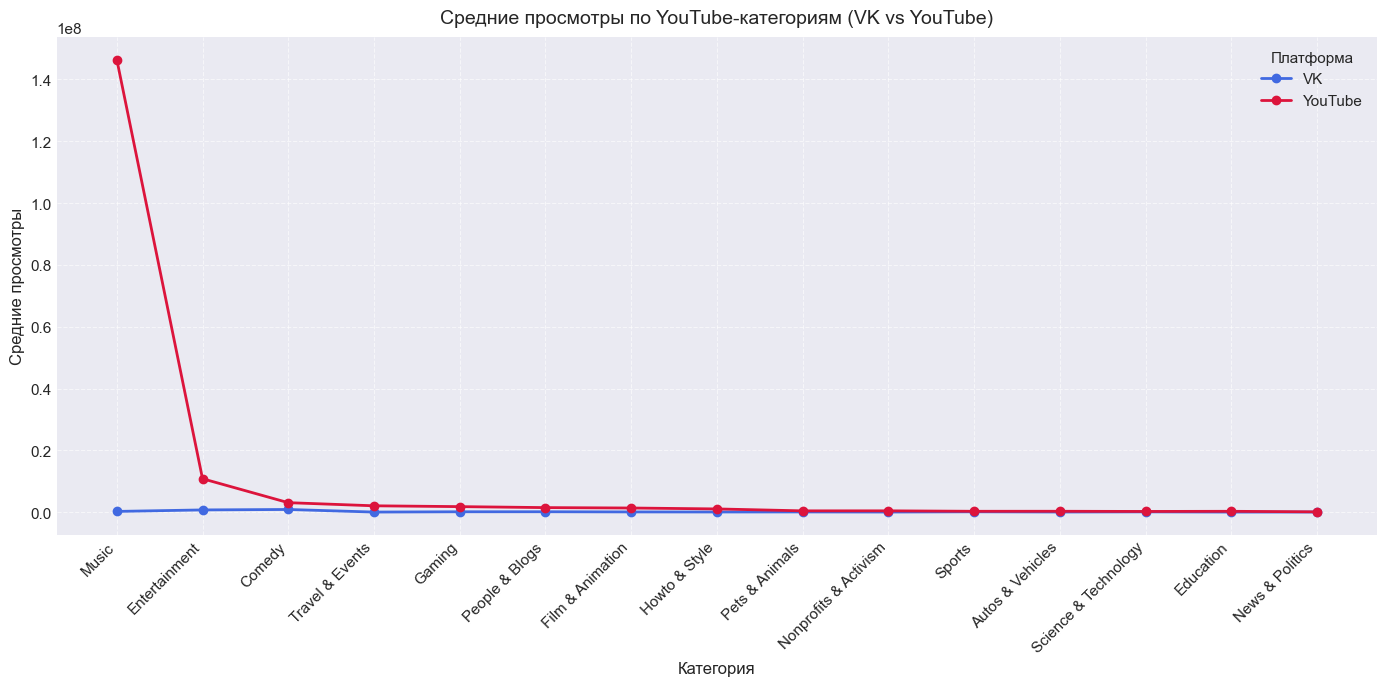

In [31]:
grouped = df.groupby('youtube_category_name', as_index=False)[['views', 'views_youtube']].mean()
grouped['total_views'] = grouped['views'] + grouped['views_youtube']
grouped = grouped.sort_values('total_views', ascending=False)

plt.figure(figsize=(14, 7))
plt.plot(grouped['youtube_category_name'], grouped['views'],
         label='VK', color='royalblue', marker='o', linewidth=2)
plt.plot(grouped['youtube_category_name'], grouped['views_youtube'],
         label='YouTube', color='crimson', marker='o', linewidth=2)
plt.title('Средние просмотры по YouTube-категориям (VK vs YouTube)', fontsize=14, pad=10)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Средние просмотры', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Платформа')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


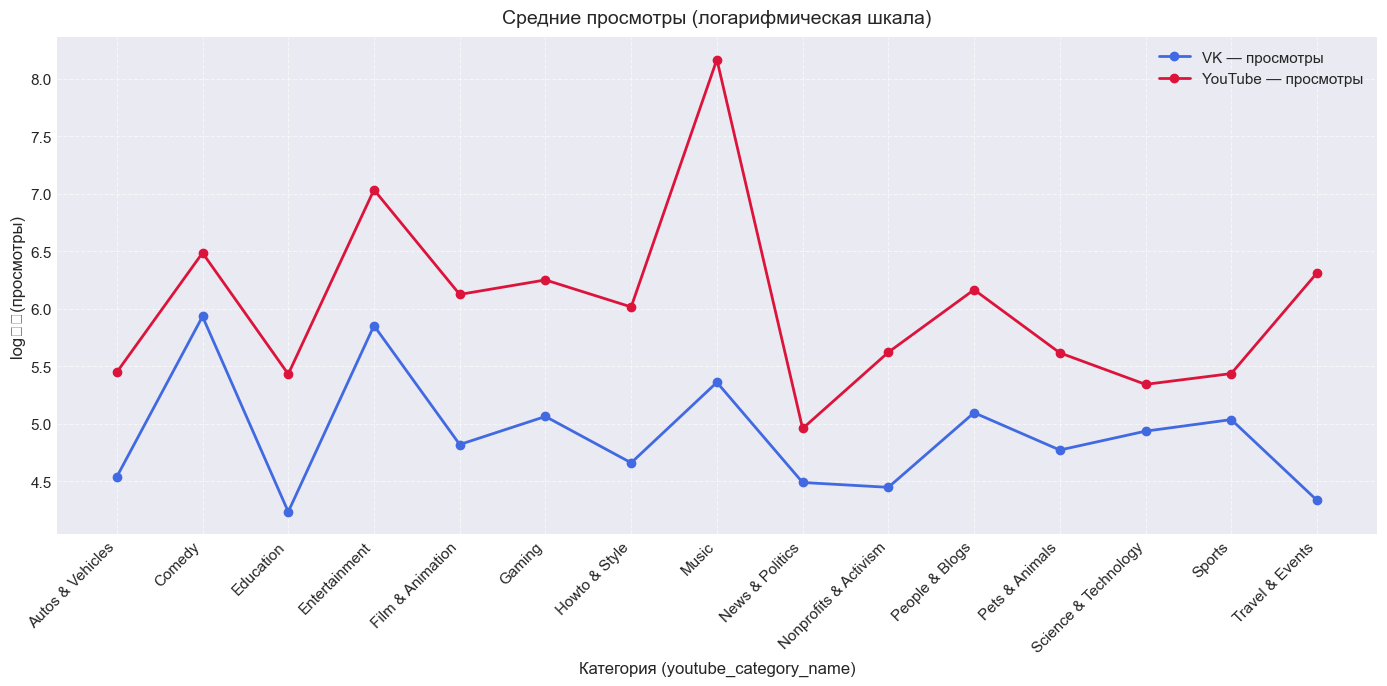

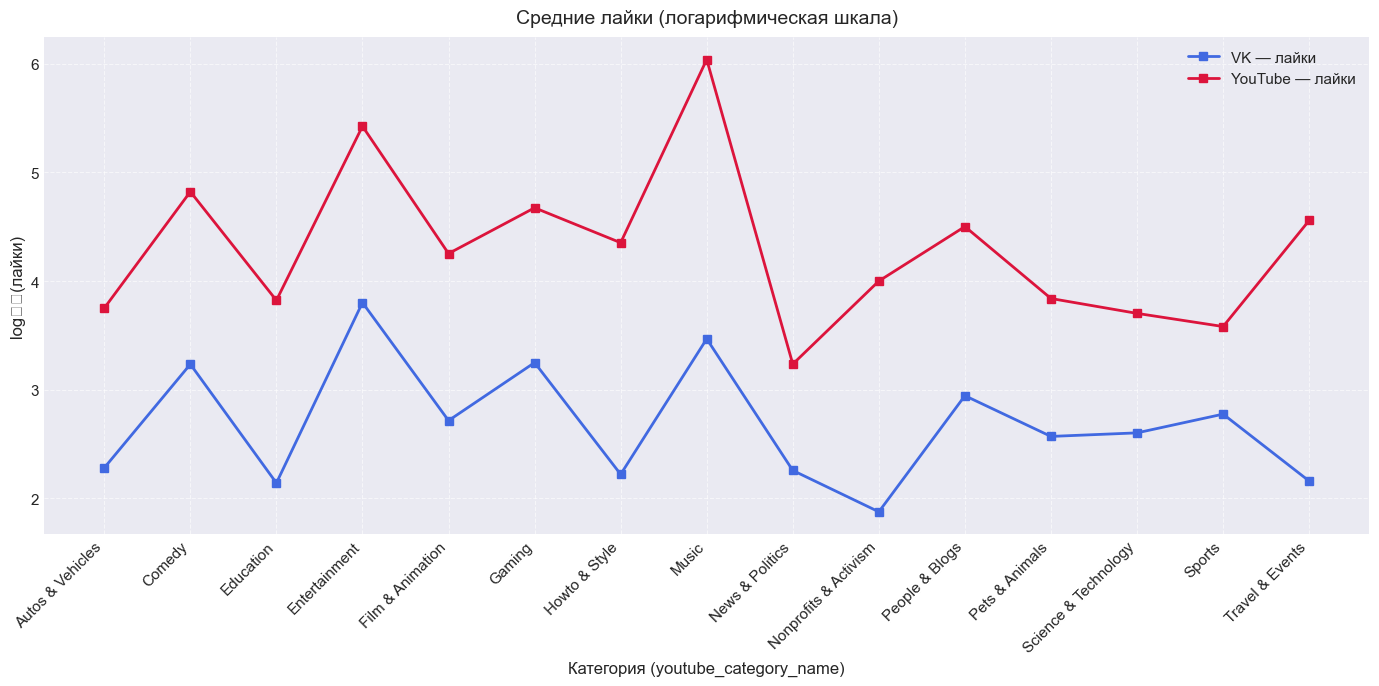

In [32]:
grouped = df.groupby('youtube_category_name', as_index=False)[
    ['views', 'views_youtube', 'likes', 'likes_youtube']
].mean()
grouped = grouped[grouped['youtube_category_name'] != 'Музыка']

for col in ['views', 'views_youtube', 'likes', 'likes_youtube']:
    grouped[col] = grouped[col].apply(lambda x: x if x > 0 else 1)

plt.figure(figsize=(14,7))
plt.plot(grouped['youtube_category_name'], np.log10(grouped['views']),
         label='VK — просмотры', color='royalblue', marker='o', linewidth=2)
plt.plot(grouped['youtube_category_name'], np.log10(grouped['views_youtube']),
         label='YouTube — просмотры', color='crimson', marker='o', linewidth=2)
plt.title('Средние просмотры (логарифмическая шкала)', fontsize=14, pad=10)
plt.xlabel('Категория (youtube_category_name)', fontsize=12)
plt.ylabel('log₁₀(просмотры)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
plt.plot(grouped['youtube_category_name'], np.log10(grouped['likes']),
         label='VK — лайки', color='royalblue', marker='s', linewidth=2)
plt.plot(grouped['youtube_category_name'], np.log10(grouped['likes_youtube']),
         label='YouTube — лайки', color='crimson', marker='s', linewidth=2)
plt.title('Средние лайки (логарифмическая шкала)', fontsize=14, pad=10)
plt.xlabel('Категория (youtube_category_name)', fontsize=12)
plt.ylabel('log₁₀(лайки)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [33]:
def to_timestamp_seconds(date_series):
    try:
        dt_series = pd.to_datetime(date_series, utc=True, errors='coerce')
        dt_series = dt_series.dt.tz_convert('UTC').dt.tz_localize(None)
        return (dt_series - pd.Timestamp('1970-01-01')).dt.total_seconds()
    except:
        timestamps = []
        for date_val in date_series:
            if pd.isna(date_val):
                timestamps.append(np.nan)
            else:
                try:
                    dt = pd.to_datetime(date_val, utc=True)
                    if hasattr(dt, 'tz') and dt.tz is not None:
                        dt = dt.tz_convert('UTC').tz_localize(None)
                    ts = (dt - pd.Timestamp('1970-01-01')).total_seconds()
                    timestamps.append(ts)
                except:
                    timestamps.append(np.nan)
        return pd.Series(timestamps, index=date_series.index)

def get_year_from_timestamp(timestamp_series):
    try:
        dt_series = pd.to_datetime(timestamp_series, unit='s', errors='coerce')
        return dt_series.dt.year
    except:
        years = []
        for ts in timestamp_series:
            if pd.isna(ts):
                years.append(np.nan)
            else:
                try:
                    dt = pd.to_datetime(ts, unit='s')
                    years.append(dt.year)
                except:
                    years.append(np.nan)
        return pd.Series(years, index=timestamp_series.index)

df_filtered = df[
    (df['date_published'].notna()) & 
    (df['date_published_youtube'].notna())
].copy()

vk_timestamps = to_timestamp_seconds(df_filtered['date_published'])
youtube_timestamps = to_timestamp_seconds(df_filtered['date_published_youtube'])
time_diff_seconds = vk_timestamps - youtube_timestamps
df_filtered['time_diff_days'] = time_diff_seconds / 86400

categories_to_analyze = ['Sports', 'Gaming', 'Science & Technology', 'Travel & Events']
df_categories = df_filtered[df_filtered['youtube_category_name'].isin(categories_to_analyze)].copy()


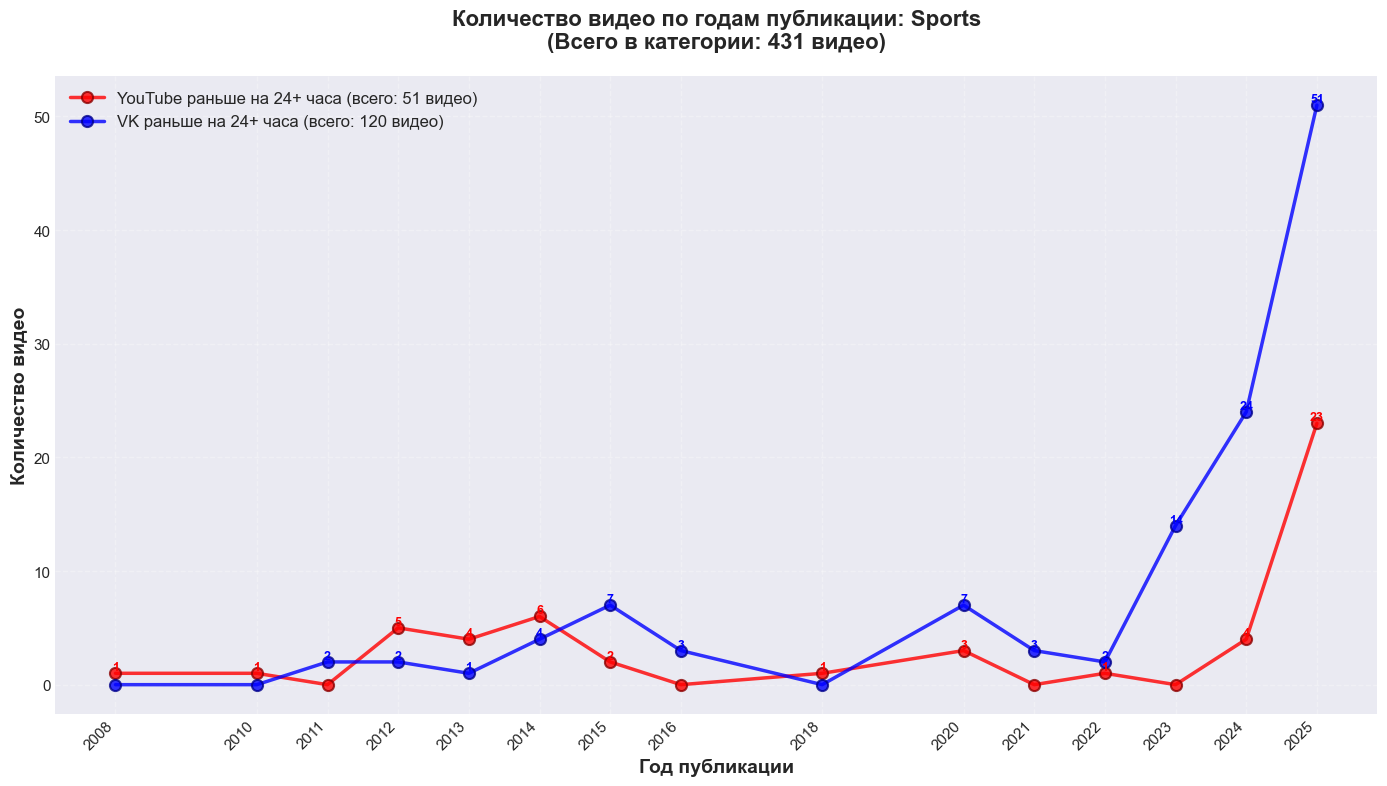

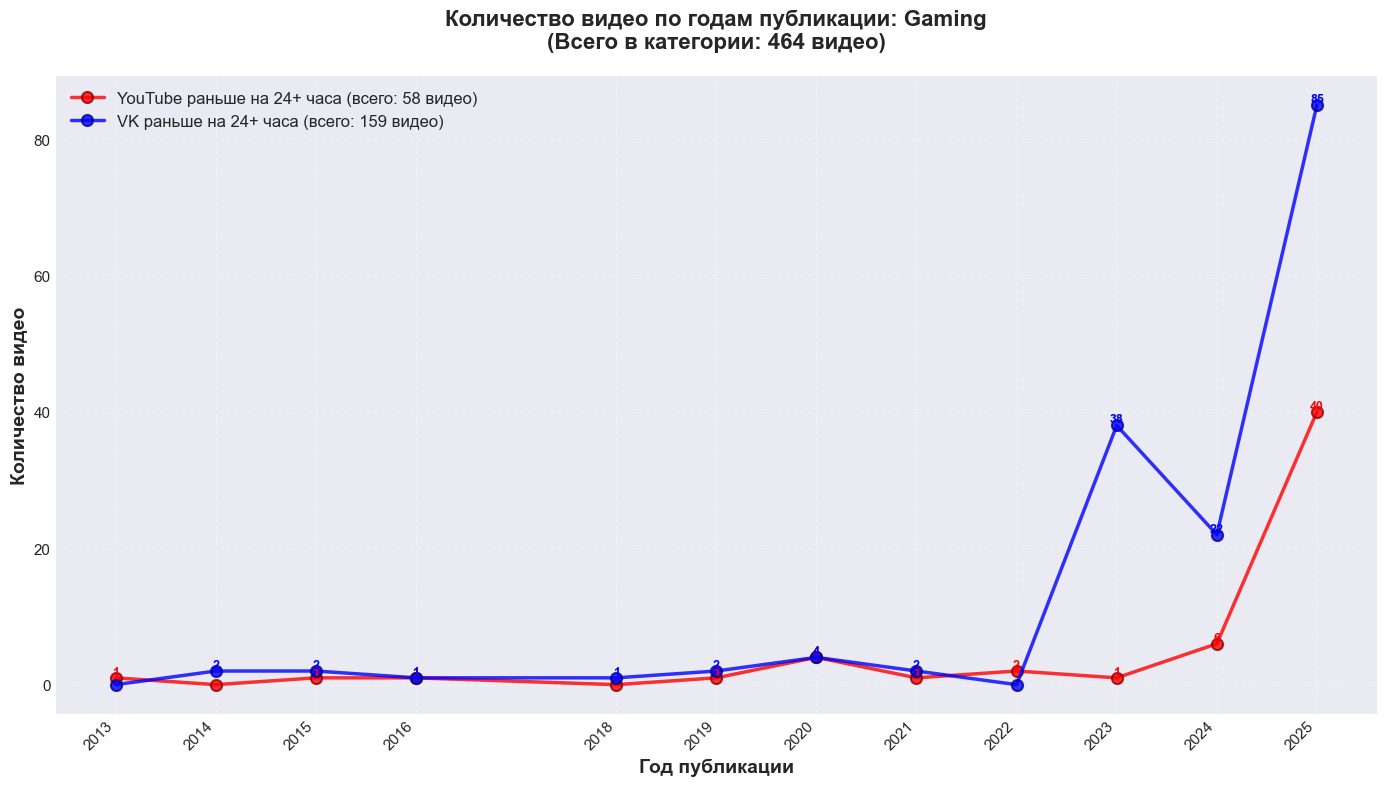

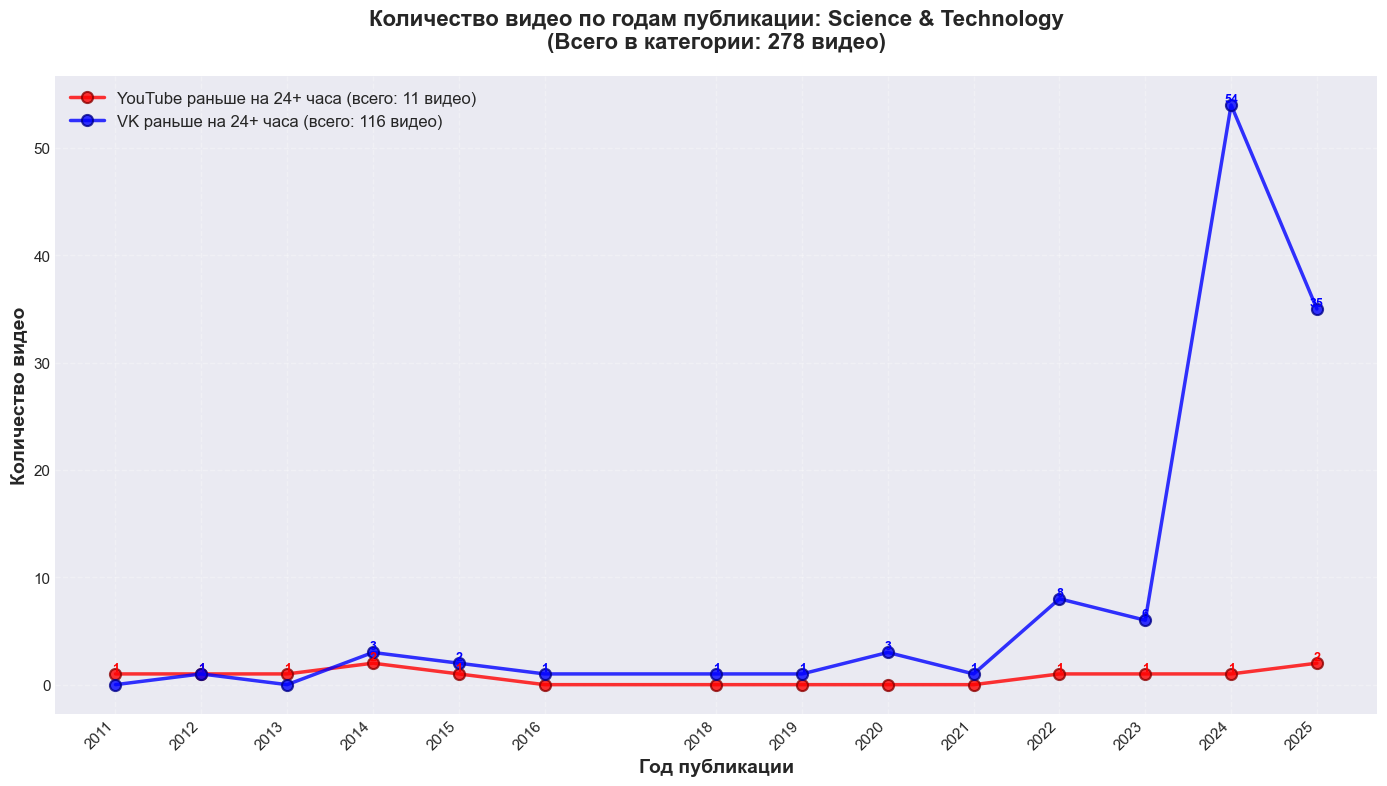

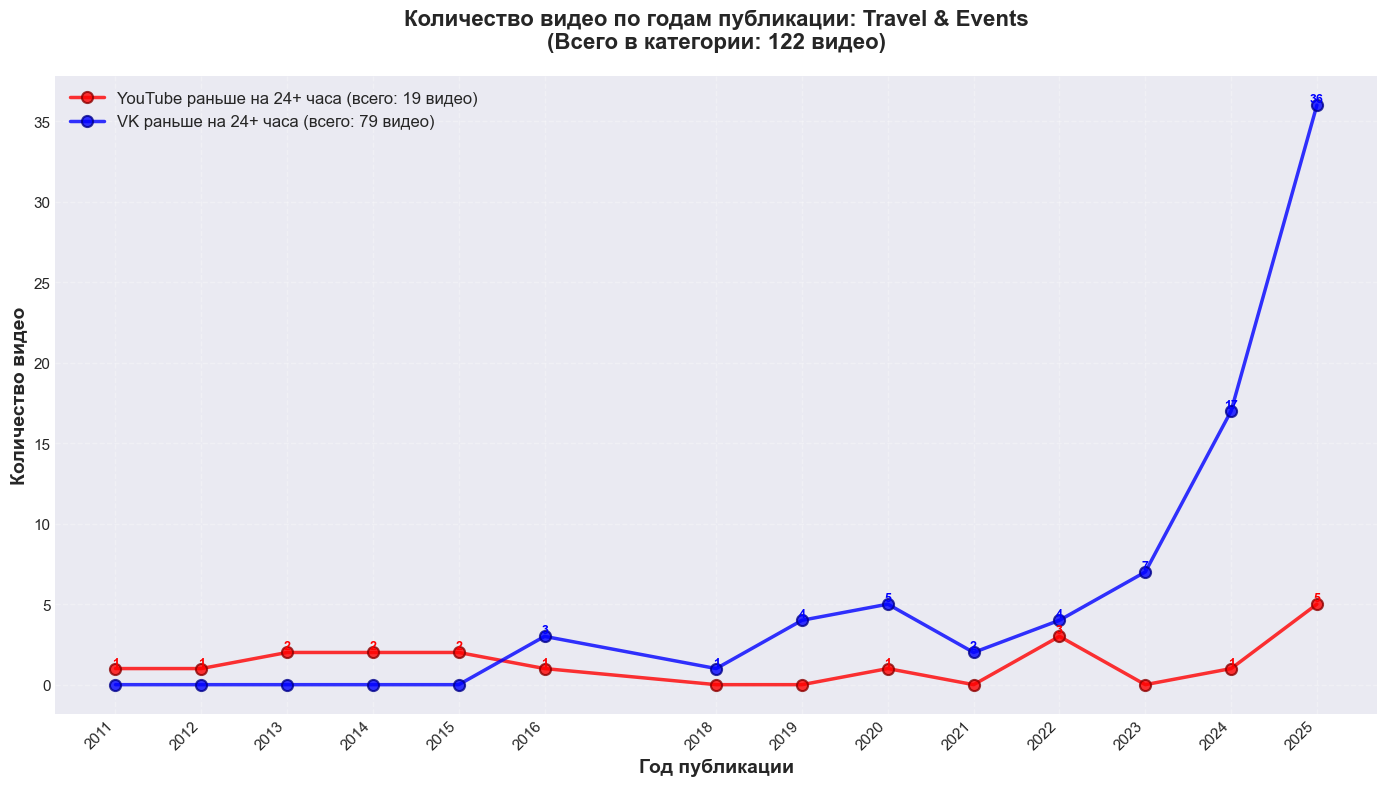

In [34]:
for category in categories_to_analyze:
    category_data = df_categories[df_categories['youtube_category_name'] == category].copy()
    
    if len(category_data) == 0:
        continue
    
    cat_youtube_earlier = category_data[category_data['time_diff_days'] <= -1].copy()
    cat_vk_earlier = category_data[category_data['time_diff_days'] >= 1].copy()
    
    cat_vk_timestamps_youtube = to_timestamp_seconds(cat_youtube_earlier['date_published'])
    cat_vk_timestamps_vk = to_timestamp_seconds(cat_vk_earlier['date_published'])
    
    cat_youtube_earlier['year'] = get_year_from_timestamp(cat_vk_timestamps_youtube)
    cat_vk_earlier['year'] = get_year_from_timestamp(cat_vk_timestamps_vk)
    
    cat_youtube_by_year = cat_youtube_earlier['year'].value_counts().sort_index()
    cat_vk_by_year = cat_vk_earlier['year'].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    all_years = sorted(set(cat_youtube_by_year.index.tolist() + cat_vk_by_year.index.tolist()))
    all_years = [y for y in all_years if not pd.isna(y)]
    
    if len(all_years) == 0:
        plt.close()
        continue
    
    youtube_counts = [cat_youtube_by_year.get(year, 0) for year in all_years]
    vk_counts = [cat_vk_by_year.get(year, 0) for year in all_years]
    
    ax.plot(all_years, youtube_counts, 'r-o', linewidth=2.5, markersize=8, 
            label=f'YouTube раньше на 24+ часа (всего: {len(cat_youtube_earlier)} видео)', 
            alpha=0.8, markerfacecolor='red', markeredgecolor='darkred', markeredgewidth=1.5)
    
    ax.plot(all_years, vk_counts, 'b-o', linewidth=2.5, markersize=8, 
            label=f'VK раньше на 24+ часа (всего: {len(cat_vk_earlier)} видео)', 
            alpha=0.8, markerfacecolor='blue', markeredgecolor='darkblue', markeredgewidth=1.5)
    
    ax.set_xlabel('Год публикации', fontsize=14, fontweight='bold')
    ax.set_ylabel('Количество видео', fontsize=14, fontweight='bold')
    ax.set_title(f'Количество видео по годам публикации: {category}\n' + 
                 f'(Всего в категории: {len(category_data)} видео)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='best', fontsize=12, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=1)
    
    ax.set_xticks(all_years)
    ax.set_xticklabels([int(y) for y in all_years], rotation=45, ha='right')
    
    for year, count in zip(all_years, youtube_counts):
        if count > 0:
            ax.text(year, count, f'{int(count)}', ha='center', va='bottom', 
                    fontsize=9, fontweight='bold', color='red')
    
    for year, count in zip(all_years, vk_counts):
        if count > 0:
            ax.text(year, count, f'{int(count)}', ha='center', va='bottom', 
                    fontsize=9, fontweight='bold', color='blue')
    
    plt.tight_layout()
    plt.show()


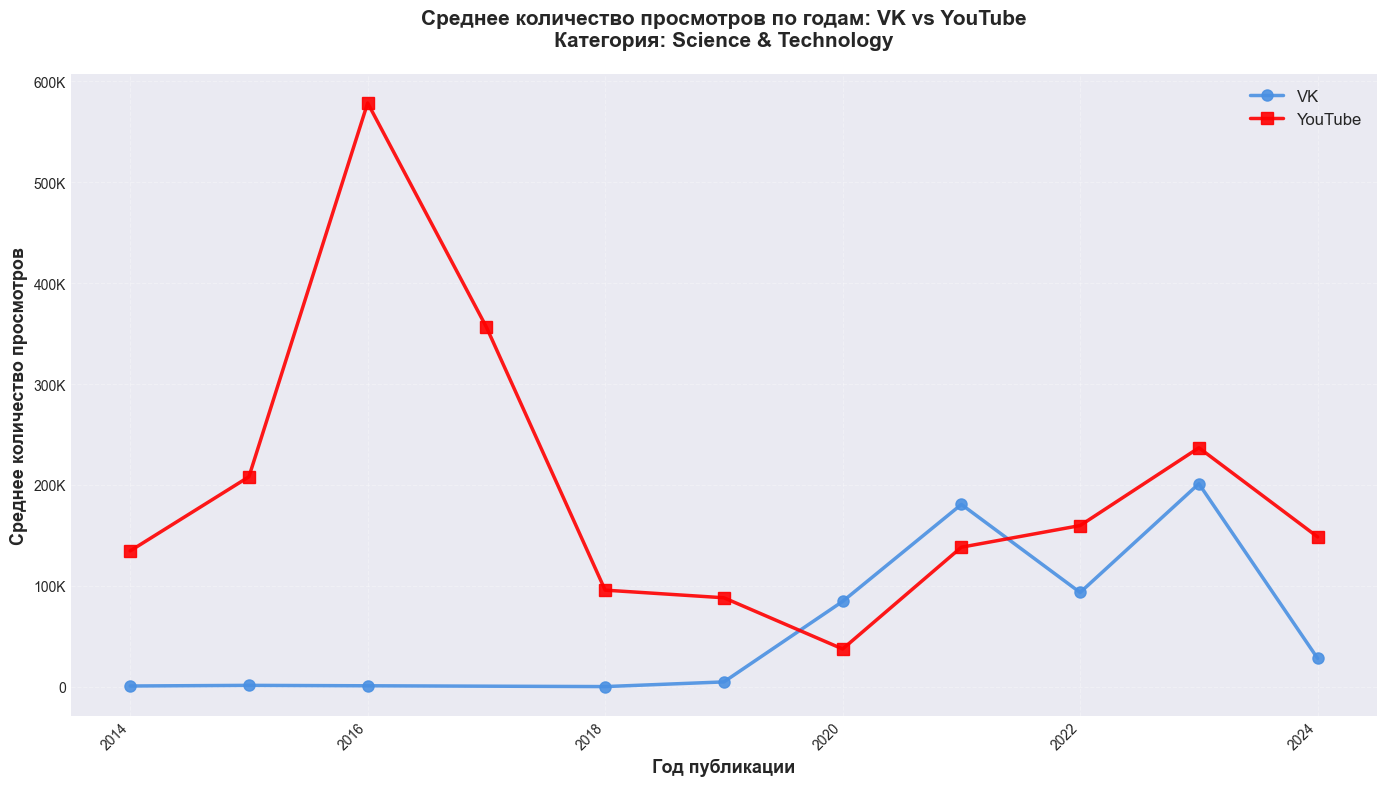

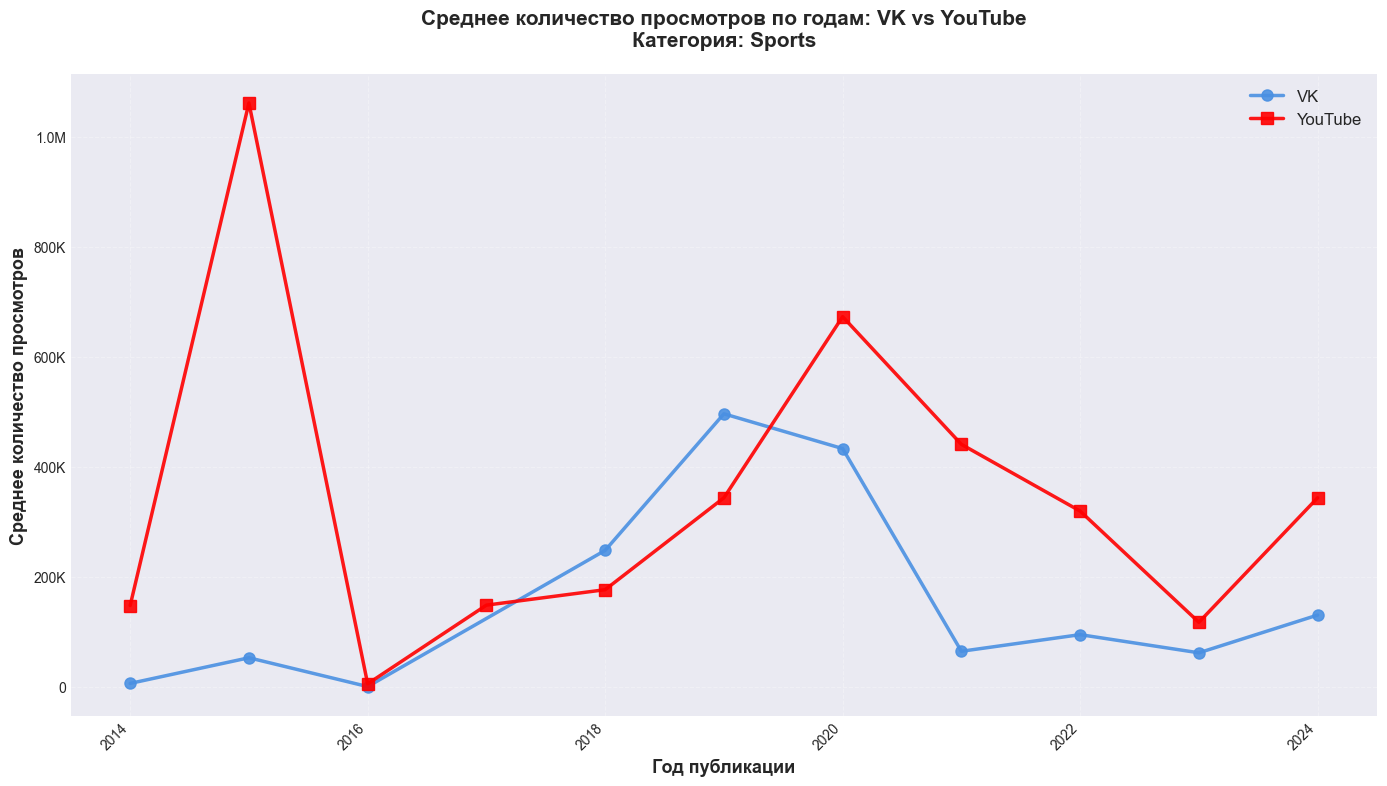

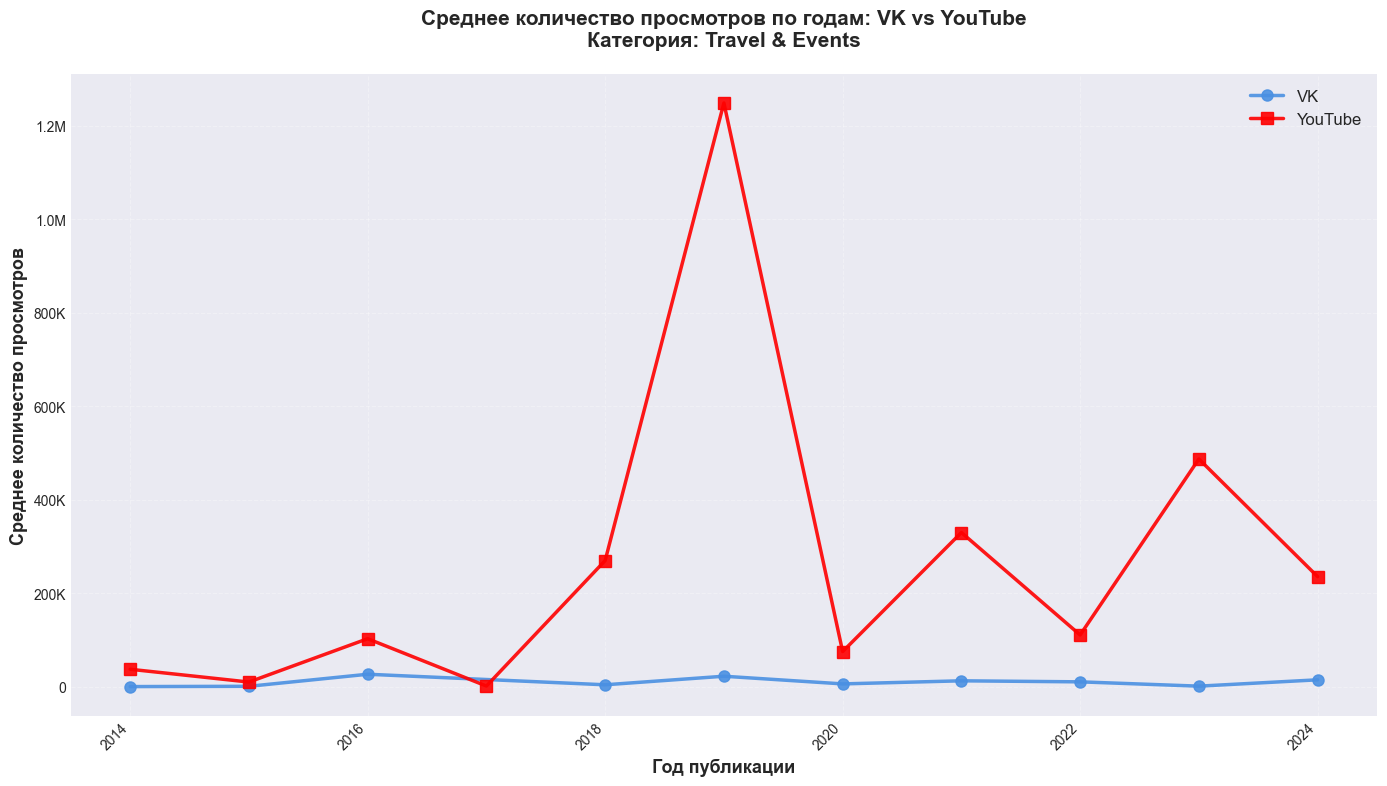

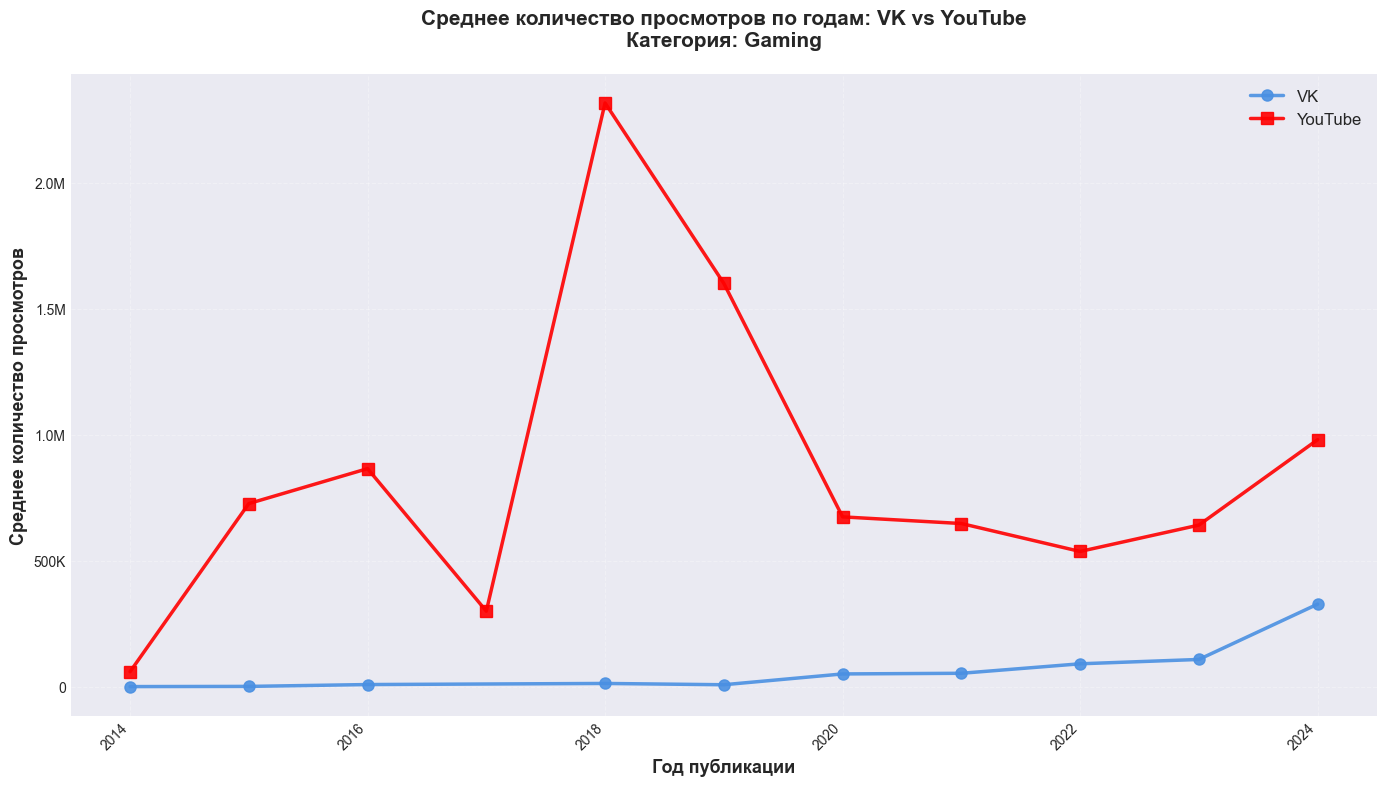

In [35]:
def extract_year(date_value):
    if pd.isna(date_value):
        return None
    try:
        if isinstance(date_value, str):
            dt = pd.to_datetime(date_value, errors='coerce')
            if pd.notna(dt):
                return dt.year
        else:
            dt = pd.to_datetime(date_value, errors='coerce')
            if pd.notna(dt):
                return dt.year
    except:
        pass
    return None

def plot_category_views(category_name):
    filtered = df[df['youtube_category_name'] == category_name].copy()
    
    if len(filtered) == 0:
        return
    
    vk_data = []
    for idx, row in filtered.iterrows():
        views = row['views']
        date_val = row['date_published']
        year = extract_year(date_val)
        if pd.notna(views) and year is not None:
            try:
                if 2014 <= year <= 2024:
                    vk_data.append({'year': year, 'views': float(views)})
            except:
                pass
    
    yt_data = []
    for idx, row in filtered.iterrows():
        views = row['views_youtube']
        date_val = row['date_published_youtube']
        year = extract_year(date_val)
        if pd.notna(views) and year is not None:
            try:
                views_float = float(views)
                if 2014 <= year <= 2024 and views_float <= 5_000_000:
                    yt_data.append({'year': year, 'views': views_float})
            except:
                pass
    
    df_vk = pd.DataFrame(vk_data) if vk_data else pd.DataFrame()
    df_yt = pd.DataFrame(yt_data) if yt_data else pd.DataFrame()
    
    vk_by_year = df_vk.groupby('year')['views'].mean().sort_index() if not df_vk.empty else pd.Series(dtype=float)
    yt_by_year = df_yt.groupby('year')['views'].mean().sort_index() if not df_yt.empty else pd.Series(dtype=float)
    
    plt.figure(figsize=(14, 8))
    
    if not vk_by_year.empty:
        plt.plot(vk_by_year.index, vk_by_year.values, 
                 marker='o', linewidth=2.5, markersize=8, 
                 label='VK', color='#4A90E2', alpha=0.9, markerfacecolor='#4A90E2')
    
    if not yt_by_year.empty:
        plt.plot(yt_by_year.index, yt_by_year.values, 
                 marker='s', linewidth=2.5, markersize=8, 
                 label='YouTube', color='#FF0000', alpha=0.9, markerfacecolor='#FF0000')
    
    plt.xlabel('Год публикации', fontsize=13, fontweight='bold')
    plt.ylabel('Среднее количество просмотров', fontsize=13, fontweight='bold')
    plt.title(f'Среднее количество просмотров по годам: VK vs YouTube\nКатегория: {category_name}', 
              fontsize=15, fontweight='bold', pad=20)
    plt.legend(fontsize=12, loc='best', framealpha=0.9)
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.yscale('linear')
    
    def format_views(x, p):
        if x >= 1e6:
            return f'{x/1e6:.1f}M'
        elif x >= 1e3:
            return f'{x/1e3:.0f}K'
        else:
            return f'{x:.0f}'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_views))
    plt.tight_layout()
    plt.show()

plot_category_views('Science & Technology')
plot_category_views('Sports')
plot_category_views('Travel & Events')
plot_category_views('Gaming')


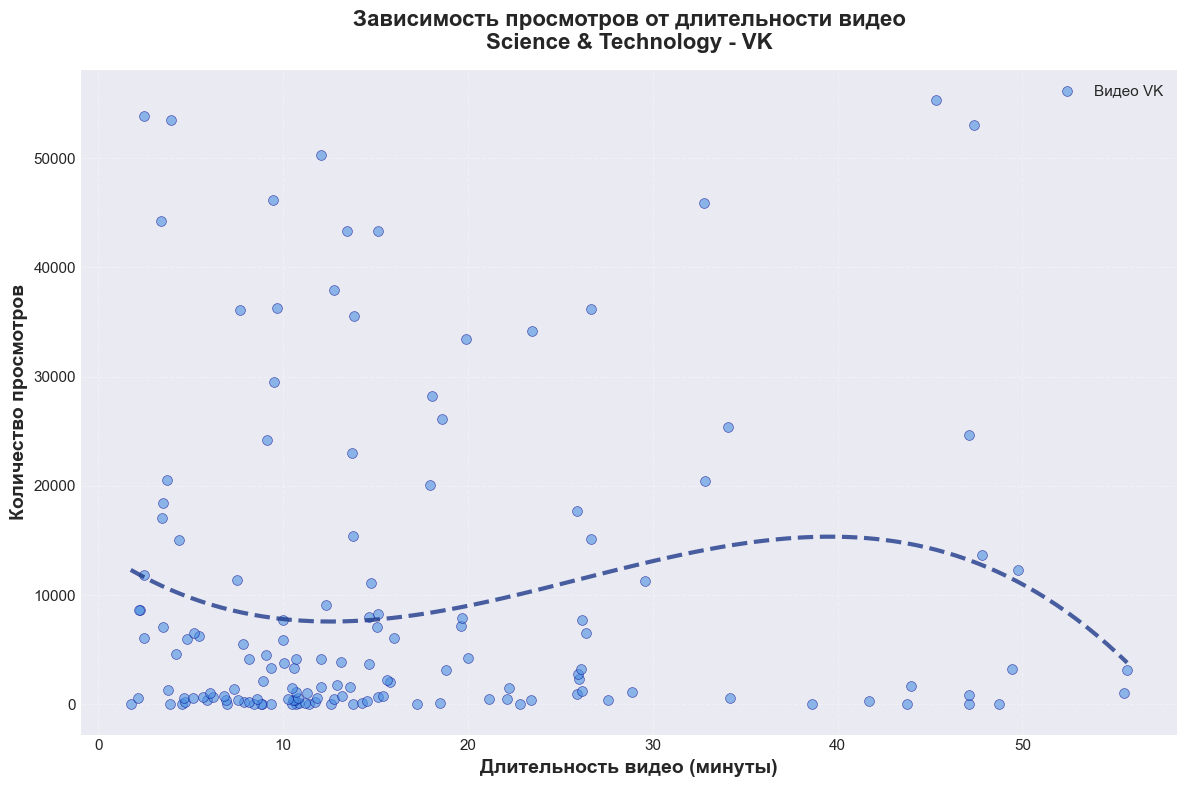

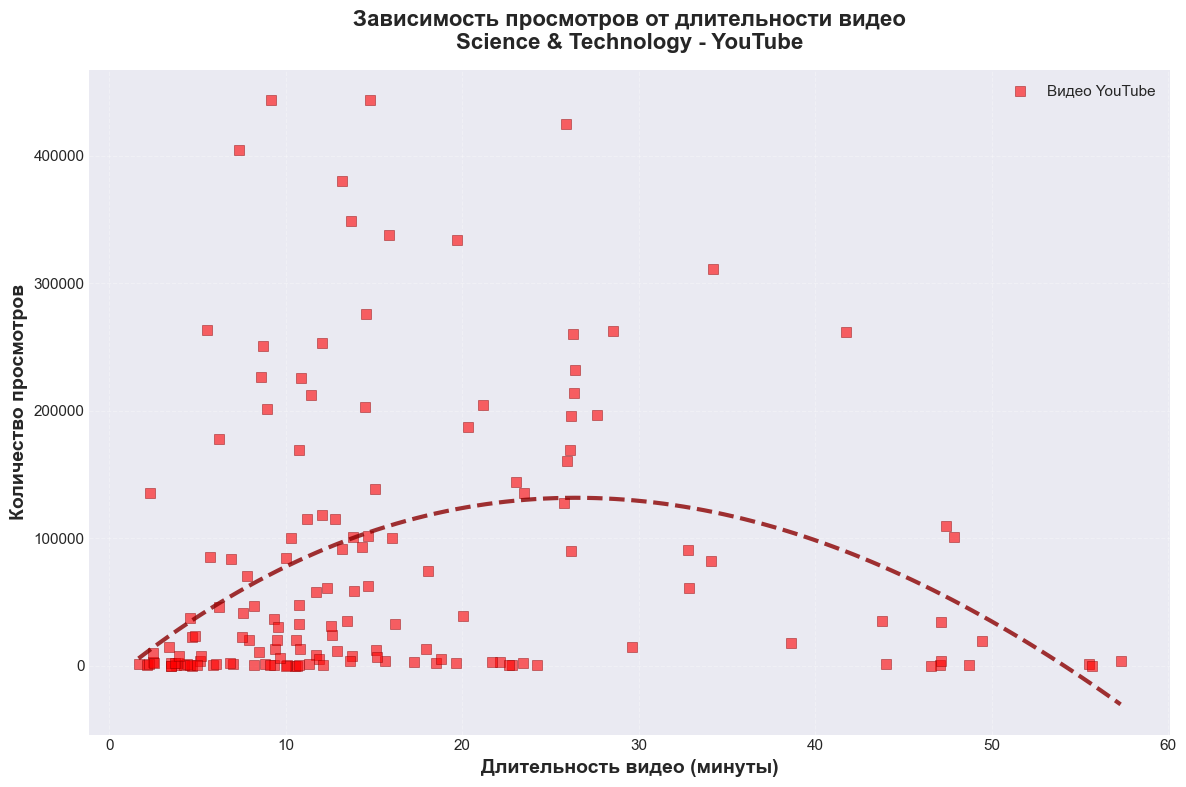

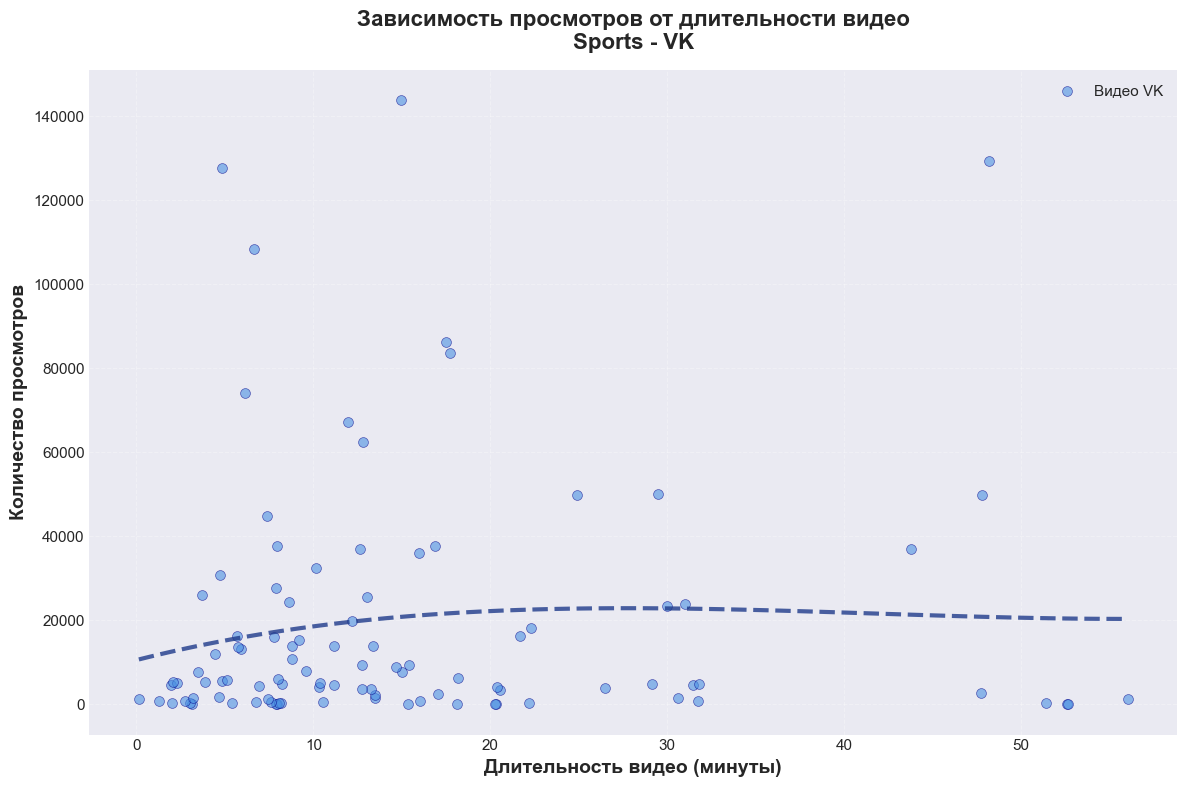

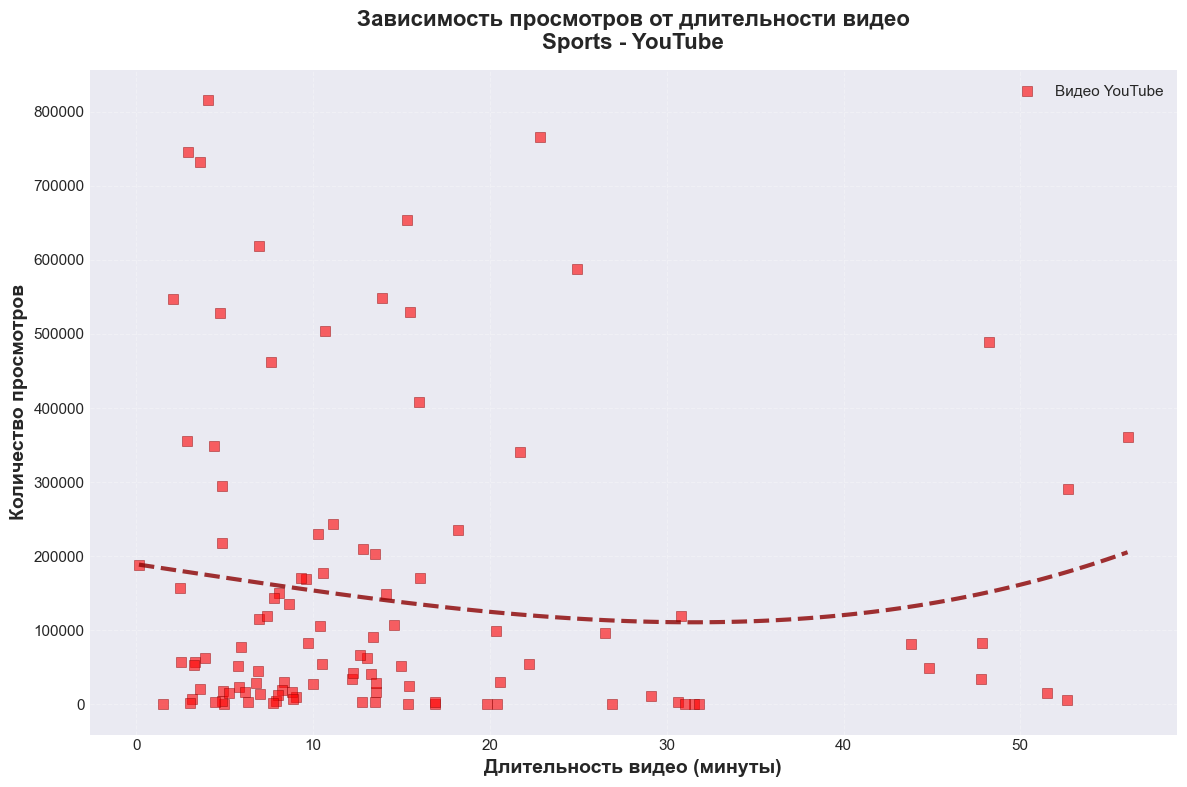

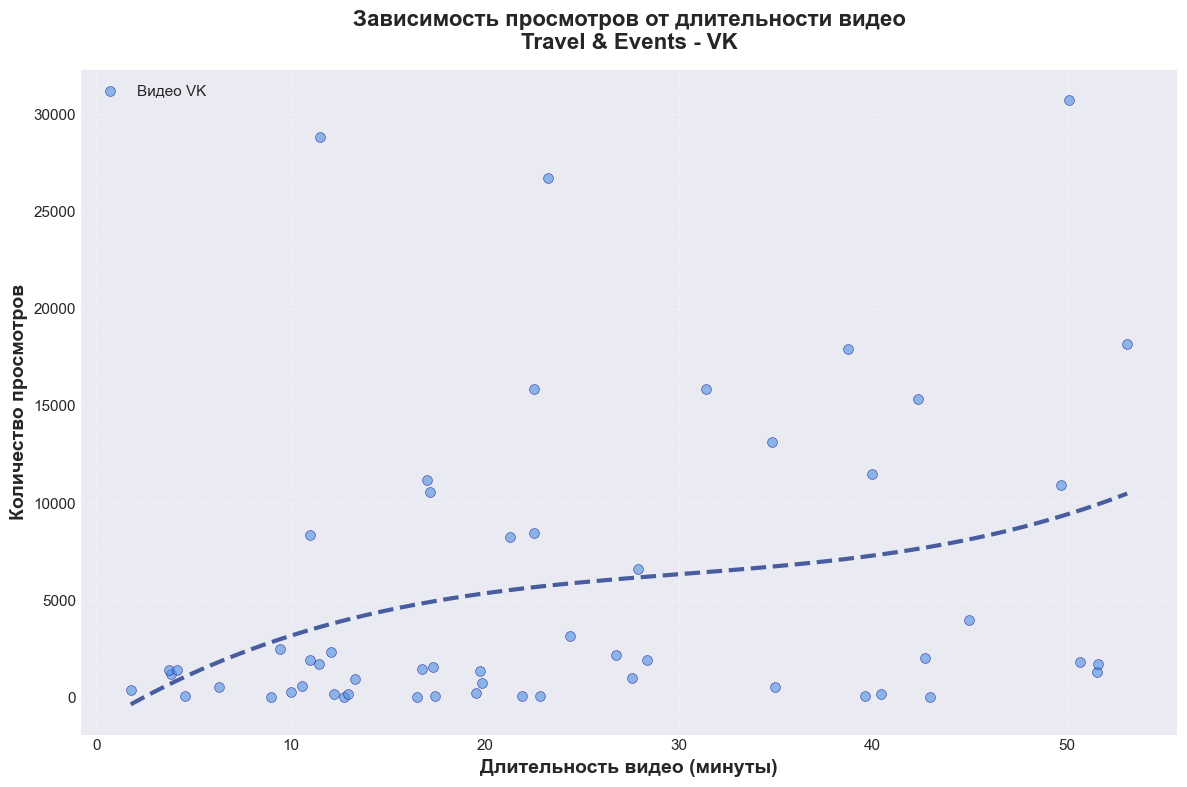

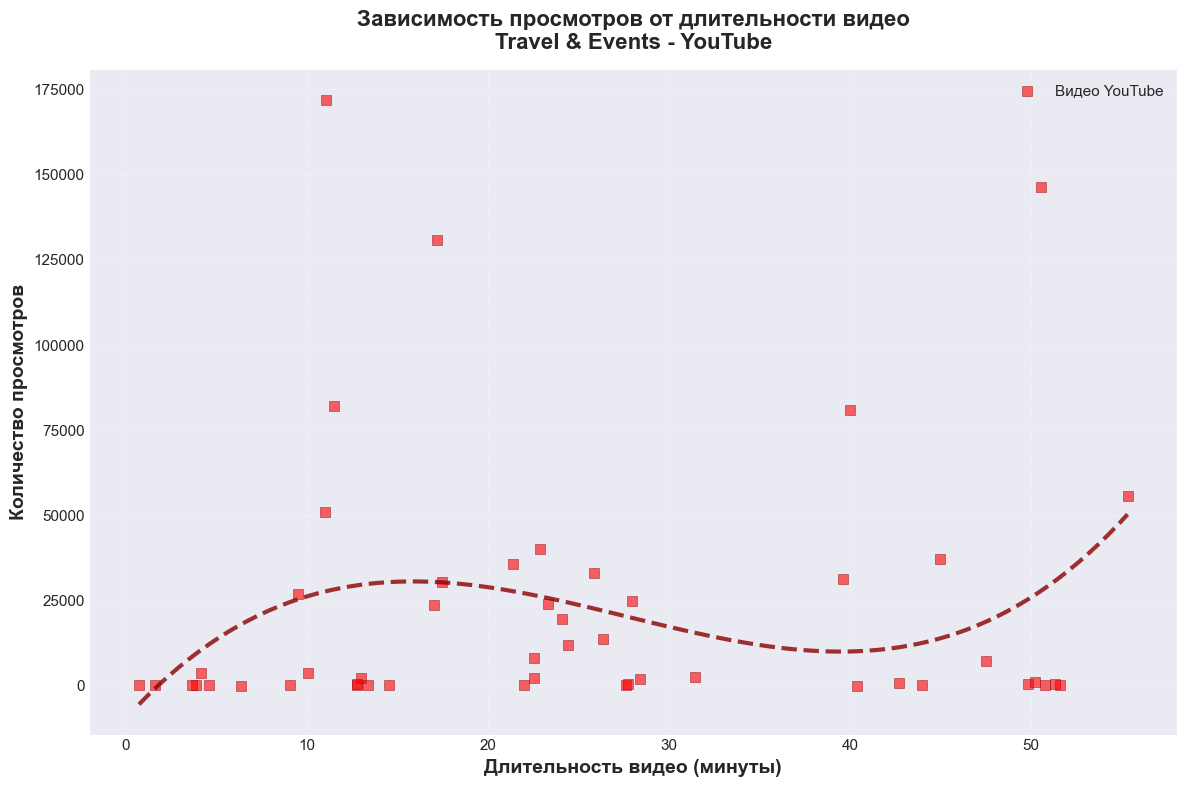

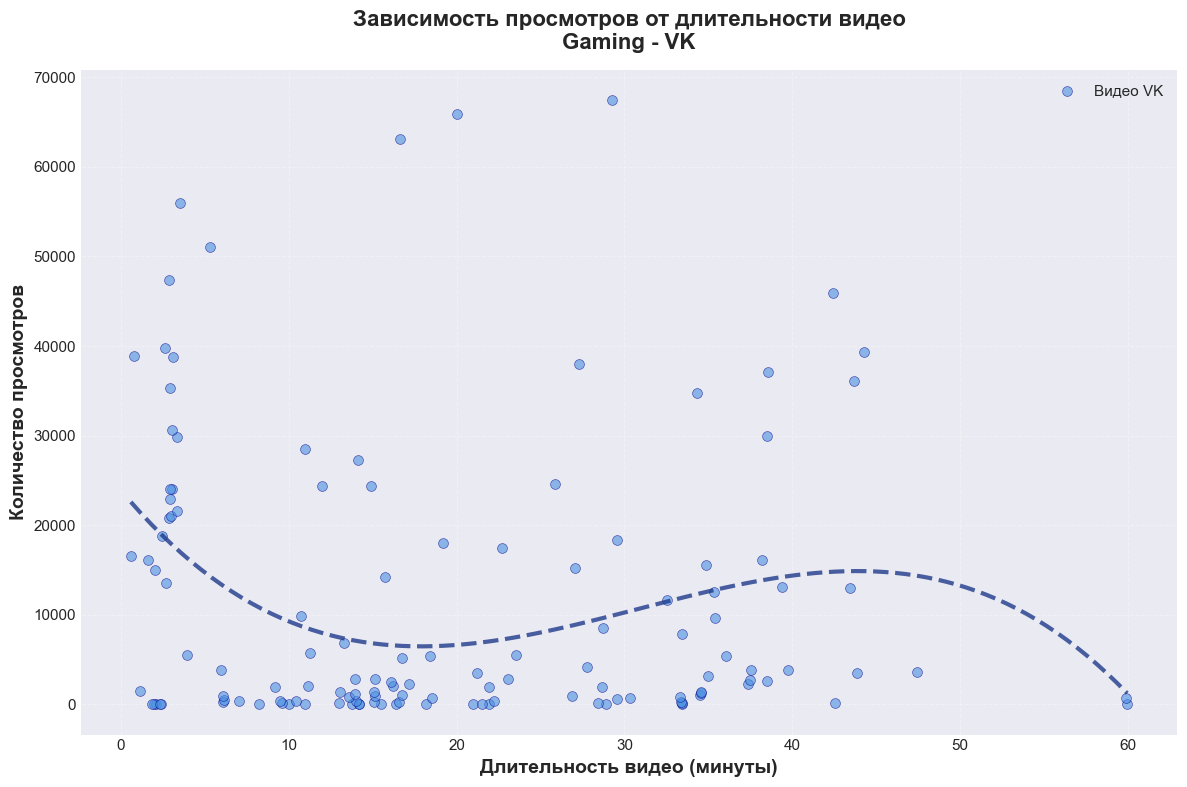

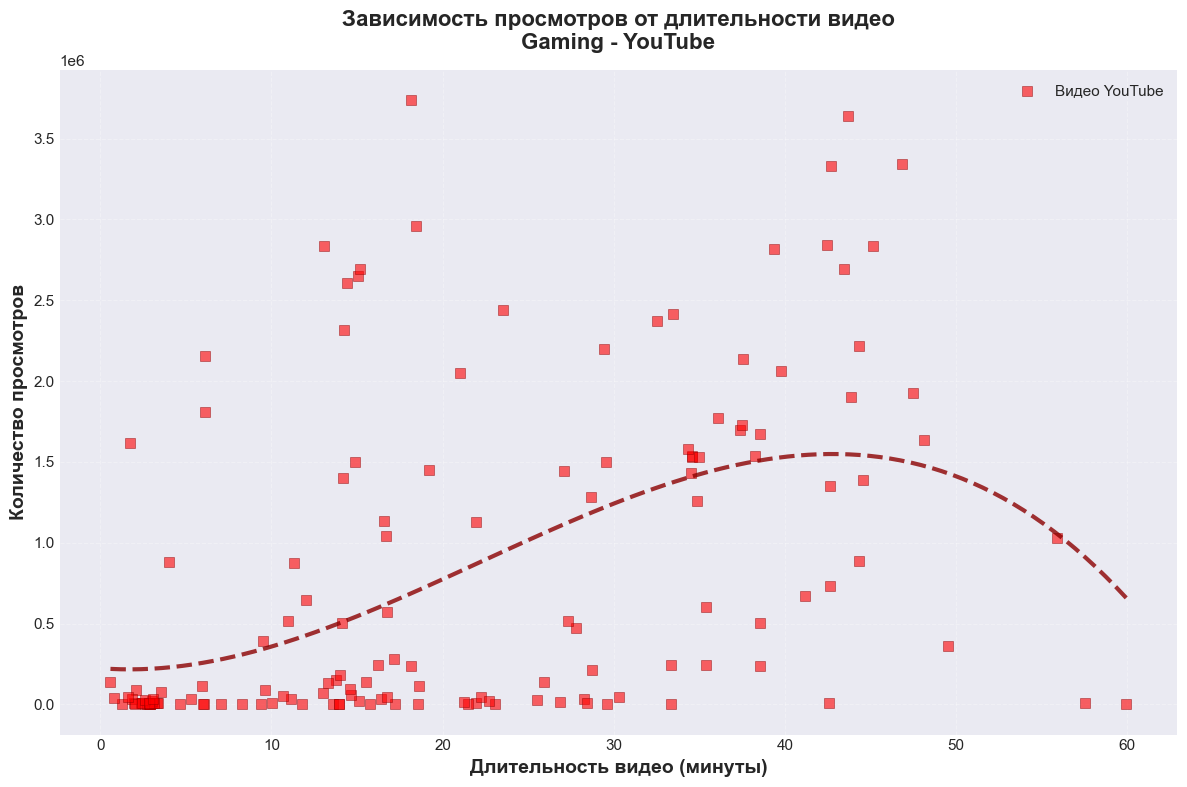

In [36]:
def plot_trend_curve(x, y, ax, color, linewidth=2.5):
    if len(x) < 3:
        return
    mask = ~(np.isnan(x) | np.isnan(y))
    x_clean = x[mask]
    y_clean = y[mask]
    if len(x_clean) < 3:
        return
    sort_idx = np.argsort(x_clean)
    x_sorted = x_clean[sort_idx]
    y_sorted = y_clean[sort_idx]
    try:
        degree = min(3, len(x_sorted) - 1)
        if degree < 1:
            return
        coeffs = np.polyfit(x_sorted, y_sorted, degree)
        poly = np.poly1d(coeffs)
        x_curve = np.linspace(x_sorted.min(), x_sorted.max(), 100)
        y_curve = poly(x_curve)
        ax.plot(x_curve, y_curve, color=color, linewidth=linewidth, 
                linestyle='--', alpha=0.8)
    except:
        pass

def format_views(x, p):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

def plot_category_duration(category_name):
    filtered = df[df['youtube_category_name'] == category_name].copy()
    
    if len(filtered) == 0:
        return
    
    filtered_list = []
    for idx, row in filtered.iterrows():
        year = extract_year(row['date_published_youtube'])
        views_yt = row['views_youtube']
        if year is not None and 2014 <= year <= 2024:
            if pd.isna(views_yt) or views_yt <= 5_000_000:
                filtered_list.append(idx)
    filtered = filtered.loc[filtered_list].copy()
    
    max_duration_seconds = 60 * 60
    vk_data = []
    for idx, row in filtered.iterrows():
        duration = row['duration']
        views = row['views']
        if pd.notna(duration) and pd.notna(views) and duration > 0 and duration < max_duration_seconds and views > 0:
            try:
                vk_data.append({
                    'duration_minutes': float(duration) / 60,
                    'views': float(views)
                })
            except:
                pass
    
    vk_df = pd.DataFrame(vk_data) if vk_data else pd.DataFrame()
    
    if not vk_df.empty and len(vk_df) > 0:
        Q1 = vk_df['views'].quantile(0.25)
        Q3 = vk_df['views'].quantile(0.75)
        IQR = Q3 - Q1
        lower = max(0, Q1 - 1.5 * IQR)
        upper = Q3 + 1.5 * IQR
        vk_df = vk_df[(vk_df['views'] >= lower) & (vk_df['views'] <= upper)].copy()
    
    yt_data = []
    for idx, row in filtered.iterrows():
        duration = row['duration_youtube']
        views = row['views_youtube']
        if pd.notna(duration) and pd.notna(views) and duration > 0 and duration < max_duration_seconds and views > 0:
            try:
                yt_data.append({
                    'duration_minutes': float(duration) / 60,
                    'views': float(views)
                })
            except:
                pass
    
    yt_df = pd.DataFrame(yt_data) if yt_data else pd.DataFrame()
    
    if not yt_df.empty and len(yt_df) > 0:
        Q1 = yt_df['views'].quantile(0.25)
        Q3 = yt_df['views'].quantile(0.75)
        IQR = Q3 - Q1
        lower = max(0, Q1 - 1.5 * IQR)
        upper = Q3 + 1.5 * IQR
        yt_df = yt_df[(yt_df['views'] >= lower) & (yt_df['views'] <= upper)].copy()
    
    plt.figure(figsize=(12, 8))
    if not vk_df.empty:
        plt.scatter(vk_df['duration_minutes'], vk_df['views'], 
                   alpha=0.6, s=50, color='#4A90E2', marker='o', 
                   edgecolors='darkblue', linewidths=0.5, label='Видео VK')
        if len(vk_df) >= 3:
            plot_trend_curve(vk_df['duration_minutes'].values, 
                            vk_df['views'].values, plt.gca(), '#1E3A8A', linewidth=3)
    
    plt.xlabel('Длительность видео (минуты)', fontsize=14, fontweight='bold')
    plt.ylabel('Количество просмотров', fontsize=14, fontweight='bold')
    plt.title(f'Зависимость просмотров от длительности видео\n{category_name} - VK', 
              fontsize=16, fontweight='bold', pad=15)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_views))
    plt.yscale('linear')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    if not yt_df.empty:
        plt.scatter(yt_df['duration_minutes'], yt_df['views'], 
                   alpha=0.6, s=50, color='#FF0000', marker='s', 
                   edgecolors='darkred', linewidths=0.5, label='Видео YouTube')
        if len(yt_df) >= 3:
            plot_trend_curve(yt_df['duration_minutes'].values, 
                            yt_df['views'].values, plt.gca(), '#8B0000', linewidth=3)
    
    plt.xlabel('Длительность видео (минуты)', fontsize=14, fontweight='bold')
    plt.ylabel('Количество просмотров', fontsize=14, fontweight='bold')
    plt.title(f'Зависимость просмотров от длительности видео\n{category_name} - YouTube', 
              fontsize=16, fontweight='bold', pad=15)
    plt.legend(fontsize=11, loc='best')
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_views))
    plt.yscale('linear')
    plt.tight_layout()
    plt.show()

plot_category_duration('Science & Technology')
plot_category_duration('Sports')
plot_category_duration('Travel & Events')
plot_category_duration('Gaming')


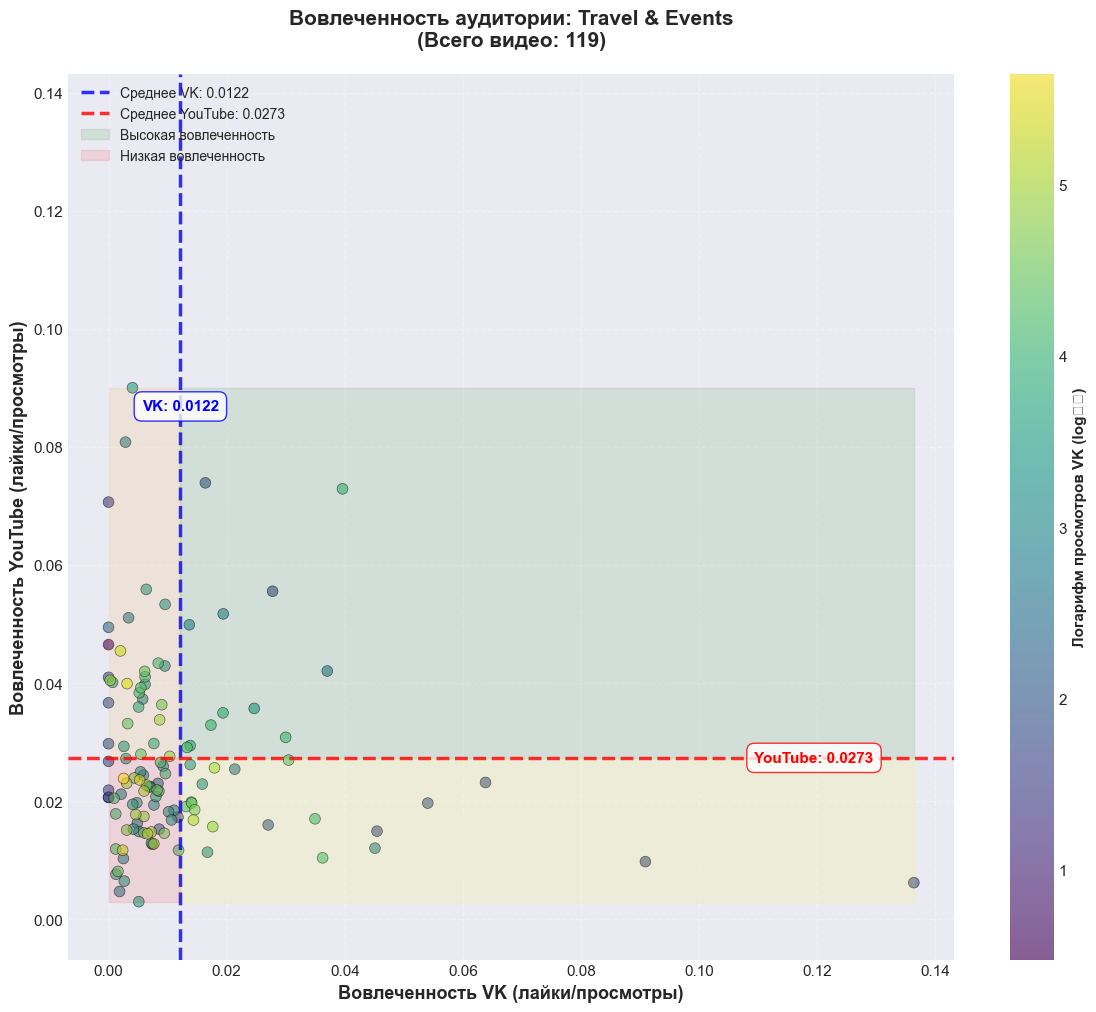

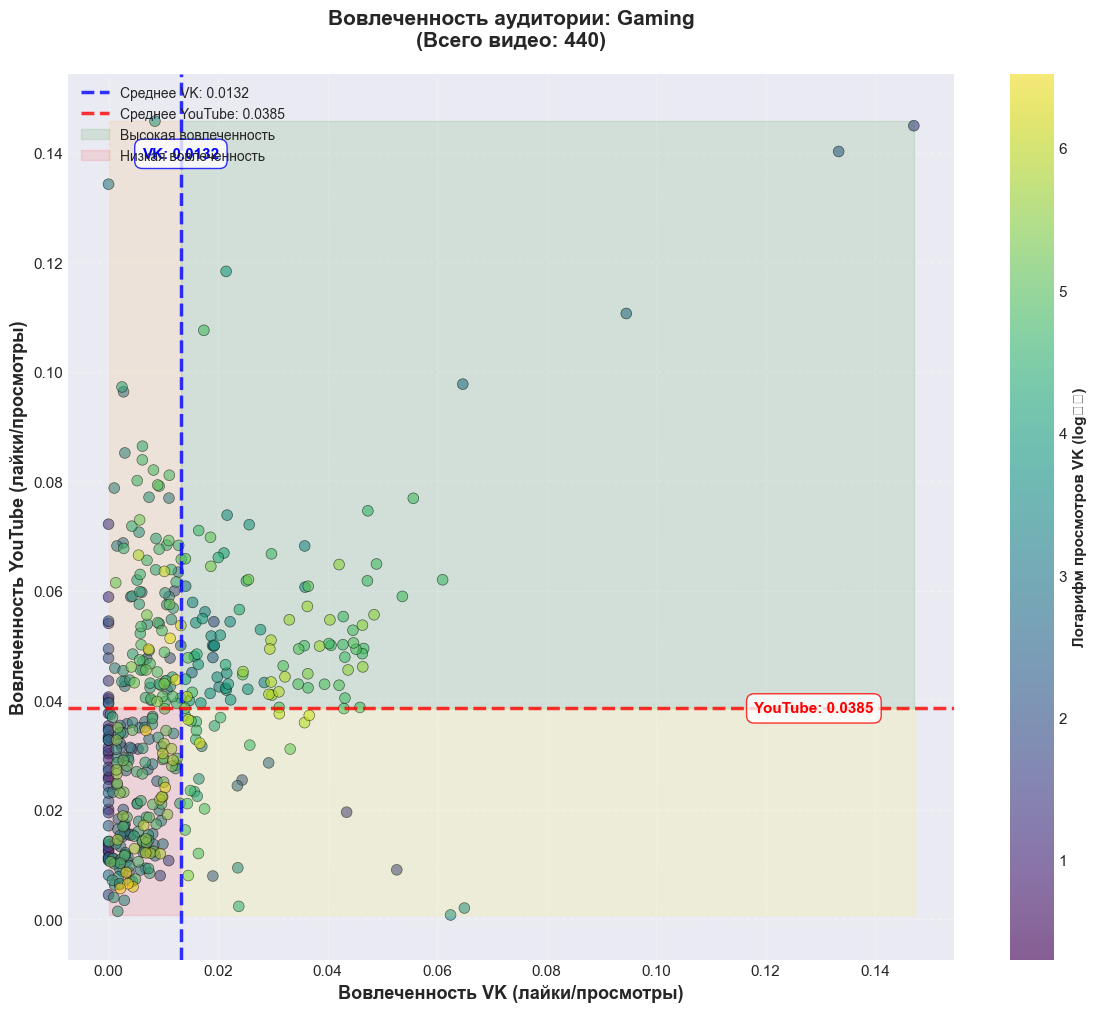

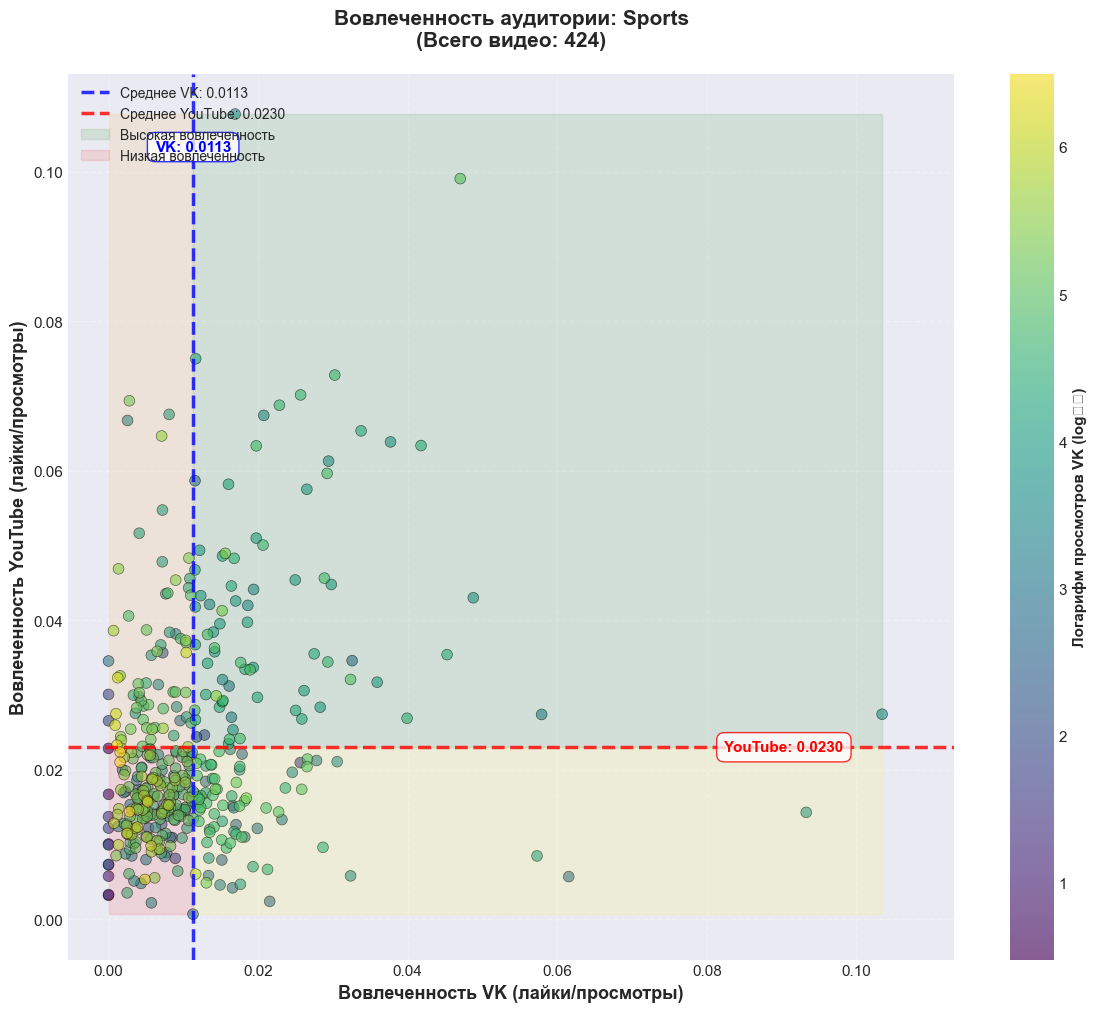

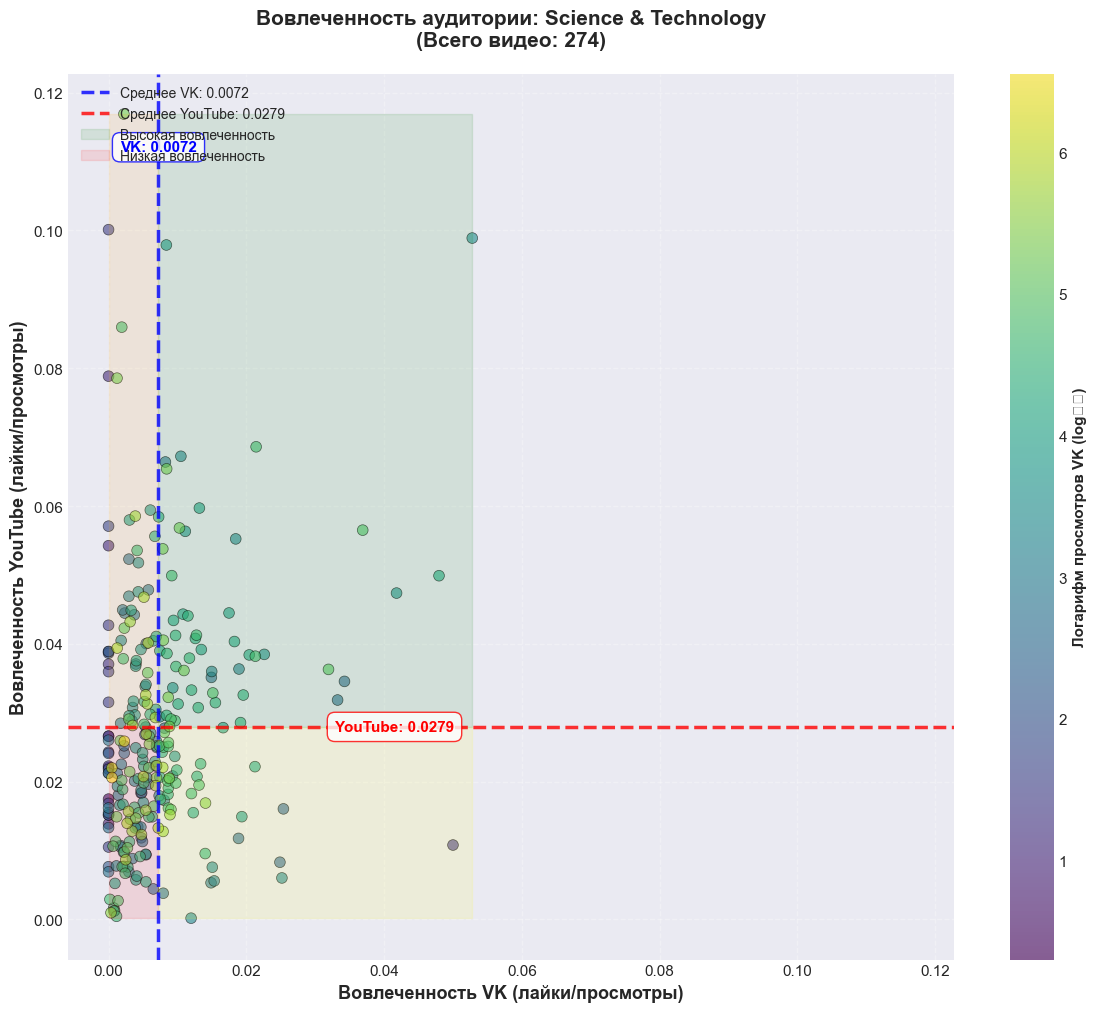

In [37]:
df['engagement_vk'] = df['likes'] / df['views']
df['engagement_youtube'] = df['likes_youtube'] / df['views_youtube']

df_filtered = df[
    (df['views'].notna()) & (df['likes'].notna()) &
    (df['views_youtube'].notna()) & (df['likes_youtube'].notna()) &
    (df['views'] > 0) & (df['views_youtube'] > 0) &
    (df['engagement_vk'].notna()) & (df['engagement_youtube'].notna()) &
    (df['engagement_vk'] >= 0) & (df['engagement_youtube'] >= 0) &
    (df['youtube_category_name'].notna())
].copy()

df_filtered = df_filtered[
    (df_filtered['engagement_vk'] <= 0.150) & 
    (df_filtered['engagement_youtube'] <= 0.150)
].copy()

categories_to_analyze = ['Travel & Events', 'Gaming', 'Sports', 'Science & Technology']

for category in categories_to_analyze:
    category_data = df_filtered[df_filtered['youtube_category_name'] == category].copy()
    
    if len(category_data) == 0:
        continue
    
    engagement_vk = category_data['engagement_vk'].values
    engagement_youtube = category_data['engagement_youtube'].values
    views_vk = category_data['views'].values
    
    mean_vk = engagement_vk.mean()
    mean_youtube = engagement_youtube.mean()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    log_views = np.log10(views_vk + 1)
    scatter = ax.scatter(engagement_vk, engagement_youtube, 
                        c=log_views, cmap='viridis', 
                        s=60, alpha=0.6, edgecolors='black', linewidths=0.5)
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Логарифм просмотров VK (log₁₀)', fontsize=11, fontweight='bold')
    
    ax.axvline(mean_vk, color='blue', linestyle='--', linewidth=2.5, 
               label=f'Среднее VK: {mean_vk:.4f}', alpha=0.8)
    ax.axhline(mean_youtube, color='red', linestyle='--', linewidth=2.5, 
               label=f'Среднее YouTube: {mean_youtube:.4f}', alpha=0.8)
    
    x_range = engagement_vk.max() - engagement_vk.min()
    y_range = engagement_youtube.max() - engagement_youtube.min()
    
    ax.text(mean_vk, engagement_youtube.max() - y_range * 0.05, 
            f'VK: {mean_vk:.4f}', 
            fontsize=11, fontweight='bold', color='blue',
            ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='blue', alpha=0.8))
    
    ax.text(engagement_vk.max() - x_range * 0.05, mean_youtube, 
            f'YouTube: {mean_youtube:.4f}', 
            fontsize=11, fontweight='bold', color='red',
            ha='right', va='center', rotation=0,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='red', alpha=0.8))
    
    x_min, x_max = engagement_vk.min(), engagement_vk.max()
    y_min, y_max = engagement_youtube.min(), engagement_youtube.max()
    
    ax.fill_between([mean_vk, x_max], mean_youtube, y_max, 
                    alpha=0.1, color='green', label='Высокая вовлеченность')
    
    ax.fill_between([x_min, mean_vk], mean_youtube, y_max, 
                    alpha=0.1, color='orange')
    
    ax.fill_between([x_min, mean_vk], y_min, mean_youtube, 
                    alpha=0.1, color='red', label='Низкая вовлеченность')
    
    ax.fill_between([mean_vk, x_max], y_min, mean_youtube, 
                    alpha=0.1, color='yellow')
    
    ax.set_xlabel('Вовлеченность VK (лайки/просмотры)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Вовлеченность YouTube (лайки/просмотры)', fontsize=13, fontweight='bold')
    ax.set_title(f'Вовлеченность аудитории: {category}\n' + 
                 f'(Всего видео: {len(category_data)})', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=1)
    
    common_min = min(engagement_vk.min(), engagement_youtube.min())
    common_max = max(engagement_vk.max(), engagement_youtube.max())
    margin = (common_max - common_min) * 0.05
    
    ax.set_xlim(common_min - margin, common_max + margin)
    ax.set_ylim(common_min - margin, common_max + margin)
    ax.set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    plt.show()


In [38]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

df_filtered = df[
    (df['date_published'].notna()) & 
    (df['date_published_youtube'].notna()) &
    (df['views'].notna()) & 
    (df['likes'].notna()) &
    (df['views_youtube'].notna()) & 
    (df['likes_youtube'].notna()) &
    (df['views'] > 0) &
    (df['likes'] >= 0) &
    (df['views_youtube'] > 0) &
    (df['likes_youtube'] >= 0)
].copy()

vk_timestamps = to_timestamp_seconds(df_filtered['date_published'])
youtube_timestamps = to_timestamp_seconds(df_filtered['date_published_youtube'])
time_diff_seconds = vk_timestamps - youtube_timestamps
time_diff_days = time_diff_seconds / 86400
df_filtered['time_diff_days'] = time_diff_days

vk_earlier_2_7 = df_filtered[
    (df_filtered['time_diff_days'] >= 2) & 
    (df_filtered['time_diff_days'] <= 7)
].copy()

vk_earlier_8_31 = df_filtered[
    (df_filtered['time_diff_days'] >= 8) & 
    (df_filtered['time_diff_days'] <= 31)
].copy()

youtube_earlier = df_filtered[
    (df_filtered['time_diff_days'] >= -31) & 
    (df_filtered['time_diff_days'] <= -2)
].copy()


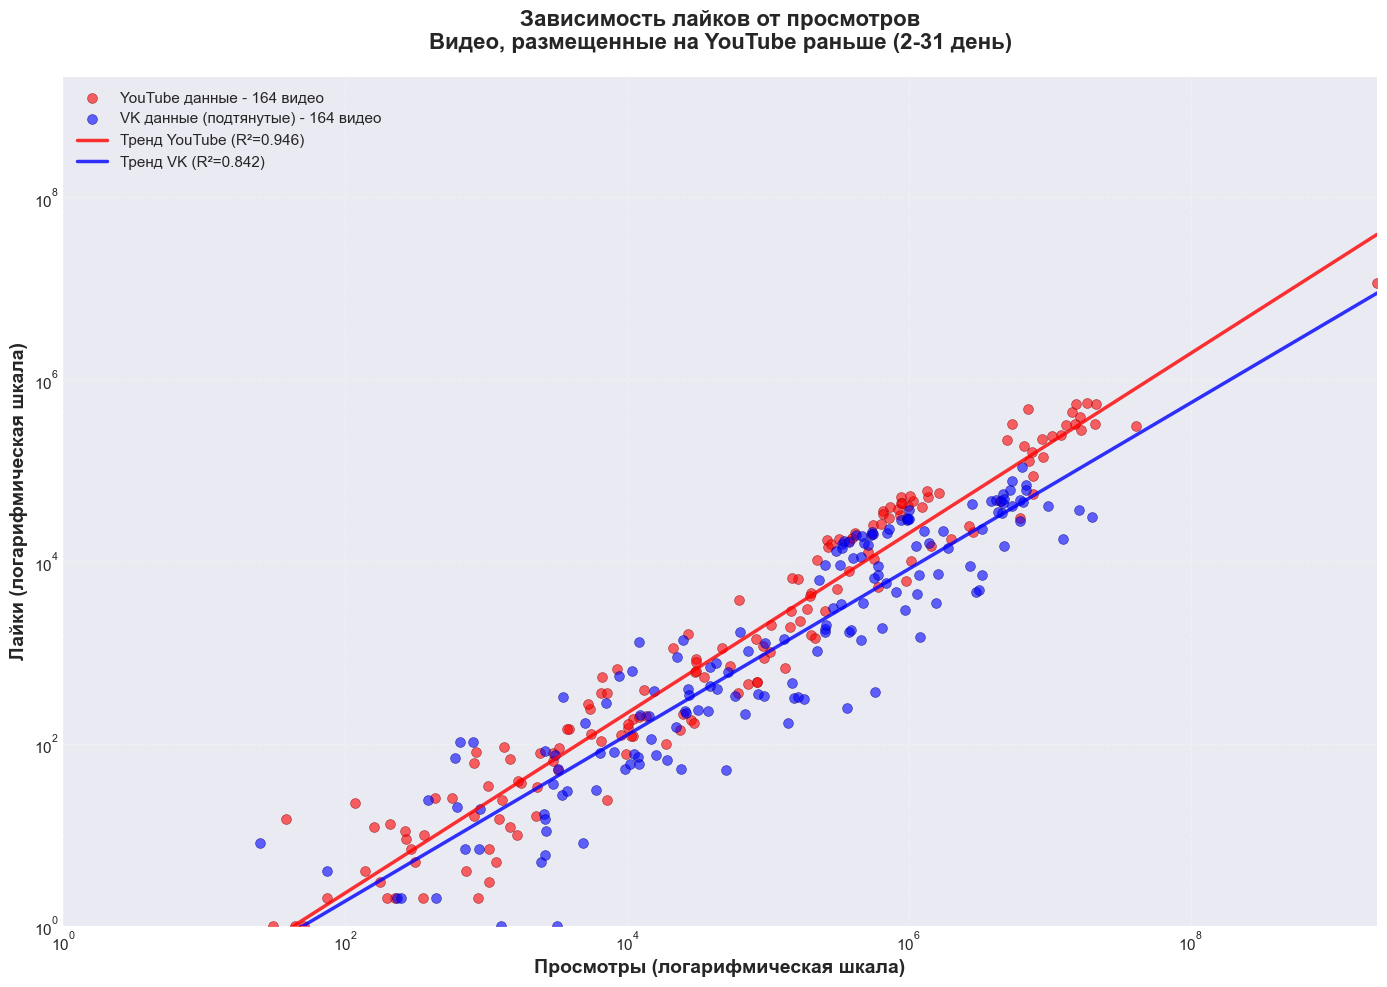

In [39]:
youtube_earlier_yt_views = youtube_earlier['views_youtube'].values
youtube_earlier_yt_likes = youtube_earlier['likes_youtube'].values
youtube_earlier_vk_views = youtube_earlier['views'].values
youtube_earlier_vk_likes = youtube_earlier['likes'].values

all_views_1 = np.concatenate([youtube_earlier_yt_views, youtube_earlier_vk_views])
all_likes_1 = np.concatenate([youtube_earlier_yt_likes, youtube_earlier_vk_likes])

use_log_scale_1 = all_views_1.max() > 1000000 or all_likes_1.max() > 100000

fig1, ax1 = plt.subplots(figsize=(14, 10))

if len(youtube_earlier_yt_views) > 0:
    ax1.scatter(youtube_earlier_yt_views, youtube_earlier_yt_likes, 
               alpha=0.6, s=50, color='red', 
               label=f'YouTube данные - {len(youtube_earlier_yt_views)} видео', 
               edgecolors='darkred', linewidths=0.5)

if len(youtube_earlier_vk_views) > 0:
    ax1.scatter(youtube_earlier_vk_views, youtube_earlier_vk_likes, 
               alpha=0.6, s=50, color='blue', 
               label=f'VK данные (подтянутые) - {len(youtube_earlier_vk_views)} видео', 
               edgecolors='darkblue', linewidths=0.5)

x_min_1, x_max_1 = all_views_1.min(), all_views_1.max()
y_min_1, y_max_1 = all_likes_1.min(), all_likes_1.max()

if use_log_scale_1:
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    log_x_min_1 = np.log10(max(x_min_1, 1))
    log_x_max_1 = np.log10(x_max_1)
    log_y_min_1 = np.log10(max(y_min_1, 1))
    log_y_max_1 = np.log10(y_max_1)
    
    log_min_1 = min(log_x_min_1, log_y_min_1)
    log_max_1 = max(log_x_max_1, log_y_max_1)
    
    x_range_min_1 = 10**log_min_1
    x_range_max_1 = 10**log_max_1
    y_range_min_1 = 10**log_min_1
    y_range_max_1 = 10**log_max_1
else:
    common_min_1 = min(x_min_1, y_min_1)
    common_max_1 = max(x_max_1, y_max_1)
    margin_1 = (common_max_1 - common_min_1) * 0.05
    x_range_min_1 = common_min_1 - margin_1
    x_range_max_1 = common_max_1 + margin_1
    y_range_min_1 = common_min_1 - margin_1
    y_range_max_1 = common_max_1 + margin_1

ax1.set_xlim(x_range_min_1, x_range_max_1)
ax1.set_ylim(y_range_min_1, y_range_max_1)

if len(youtube_earlier_yt_views) > 1:
    if use_log_scale_1:
        valid_mask_yt = (youtube_earlier_yt_views > 0) & (youtube_earlier_yt_likes > 0) & np.isfinite(youtube_earlier_yt_views) & np.isfinite(youtube_earlier_yt_likes)
        yt_views_valid = youtube_earlier_yt_views[valid_mask_yt]
        yt_likes_valid = youtube_earlier_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                log_yt_views = np.log10(yt_views_valid)
                log_yt_likes = np.log10(yt_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_yt_views, log_yt_likes)
                x_line = np.logspace(np.log10(x_range_min_1), np.log10(x_range_max_1), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax1.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_yt = np.isfinite(youtube_earlier_yt_views) & np.isfinite(youtube_earlier_yt_likes)
        yt_views_valid = youtube_earlier_yt_views[valid_mask_yt]
        yt_likes_valid = youtube_earlier_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(yt_views_valid, yt_likes_valid)
                x_line = np.linspace(x_range_min_1, x_range_max_1, 100)
                y_line = slope * x_line + intercept
                ax1.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

if len(youtube_earlier_vk_views) > 1:
    if use_log_scale_1:
        valid_mask_vk = (youtube_earlier_vk_views > 0) & (youtube_earlier_vk_likes > 0) & np.isfinite(youtube_earlier_vk_views) & np.isfinite(youtube_earlier_vk_likes)
        vk_views_valid = youtube_earlier_vk_views[valid_mask_vk]
        vk_likes_valid = youtube_earlier_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                log_vk_views = np.log10(vk_views_valid)
                log_vk_likes = np.log10(vk_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_vk_views, log_vk_likes)
                x_line = np.logspace(np.log10(x_range_min_1), np.log10(x_range_max_1), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax1.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_vk = np.isfinite(youtube_earlier_vk_views) & np.isfinite(youtube_earlier_vk_likes)
        vk_views_valid = youtube_earlier_vk_views[valid_mask_vk]
        vk_likes_valid = youtube_earlier_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(vk_views_valid, vk_likes_valid)
                x_line = np.linspace(x_range_min_1, x_range_max_1, 100)
                y_line = slope * x_line + intercept
                ax1.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

ax1.set_xlabel('Просмотры', fontsize=14, fontweight='bold')
ax1.set_ylabel('Лайки', fontsize=14, fontweight='bold')
ax1.set_title('Зависимость лайков от просмотров\nВидео, размещенные на YouTube раньше (2-31 день)', 
             fontsize=16, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

if use_log_scale_1:
    ax1.set_xlabel('Просмотры (логарифмическая шкала)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Лайки (логарифмическая шкала)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


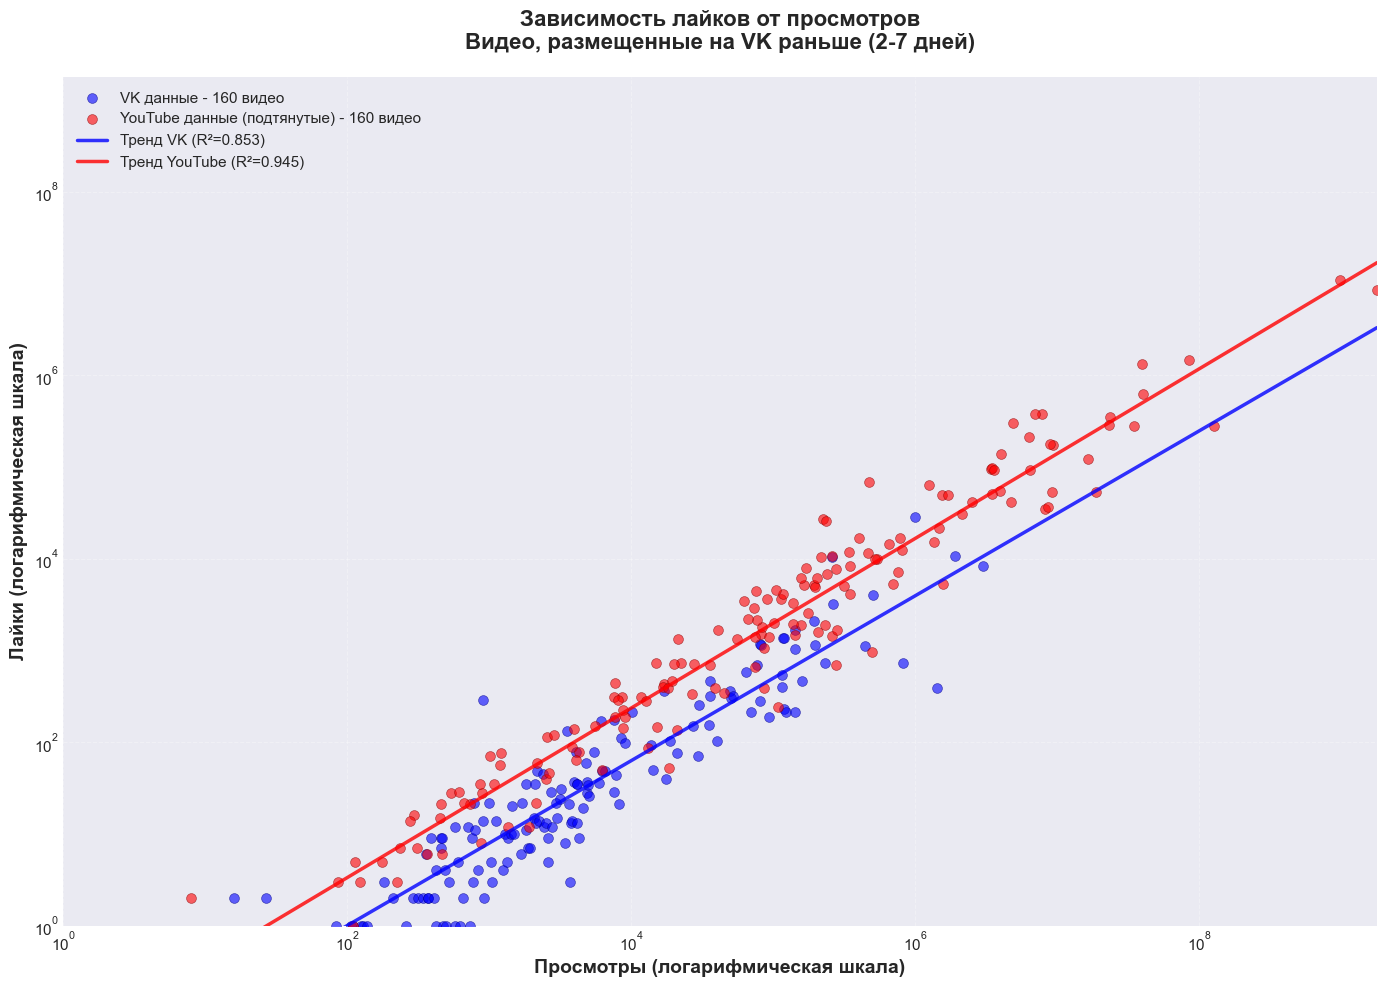

In [40]:
vk_earlier_2_7_vk_views = vk_earlier_2_7['views'].values
vk_earlier_2_7_vk_likes = vk_earlier_2_7['likes'].values
vk_earlier_2_7_yt_views = vk_earlier_2_7['views_youtube'].values
vk_earlier_2_7_yt_likes = vk_earlier_2_7['likes_youtube'].values

all_views_2 = np.concatenate([vk_earlier_2_7_vk_views, vk_earlier_2_7_yt_views])
all_likes_2 = np.concatenate([vk_earlier_2_7_vk_likes, vk_earlier_2_7_yt_likes])

use_log_scale_2 = all_views_2.max() > 1000000 or all_likes_2.max() > 100000

fig2, ax2 = plt.subplots(figsize=(14, 10))

if len(vk_earlier_2_7_vk_views) > 0:
    ax2.scatter(vk_earlier_2_7_vk_views, vk_earlier_2_7_vk_likes, 
               alpha=0.6, s=50, color='blue', 
               label=f'VK данные - {len(vk_earlier_2_7_vk_views)} видео', 
               edgecolors='darkblue', linewidths=0.5)

if len(vk_earlier_2_7_yt_views) > 0:
    ax2.scatter(vk_earlier_2_7_yt_views, vk_earlier_2_7_yt_likes, 
               alpha=0.6, s=50, color='red', 
               label=f'YouTube данные (подтянутые) - {len(vk_earlier_2_7_yt_views)} видео', 
               edgecolors='darkred', linewidths=0.5)

x_min_2, x_max_2 = all_views_2.min(), all_views_2.max()
y_min_2, y_max_2 = all_likes_2.min(), all_likes_2.max()

if use_log_scale_2:
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    log_x_min_2 = np.log10(max(x_min_2, 1))
    log_x_max_2 = np.log10(x_max_2)
    log_y_min_2 = np.log10(max(y_min_2, 1))
    log_y_max_2 = np.log10(y_max_2)
    
    log_min_2 = min(log_x_min_2, log_y_min_2)
    log_max_2 = max(log_x_max_2, log_y_max_2)
    
    x_range_min_2 = 10**log_min_2
    x_range_max_2 = 10**log_max_2
    y_range_min_2 = 10**log_min_2
    y_range_max_2 = 10**log_max_2
else:
    common_min_2 = min(x_min_2, y_min_2)
    common_max_2 = max(x_max_2, y_max_2)
    margin_2 = (common_max_2 - common_min_2) * 0.05
    x_range_min_2 = common_min_2 - margin_2
    x_range_max_2 = common_max_2 + margin_2
    y_range_min_2 = common_min_2 - margin_2
    y_range_max_2 = common_max_2 + margin_2

ax2.set_xlim(x_range_min_2, x_range_max_2)
ax2.set_ylim(y_range_min_2, y_range_max_2)

if len(vk_earlier_2_7_vk_views) > 1:
    if use_log_scale_2:
        valid_mask_vk = (vk_earlier_2_7_vk_views > 0) & (vk_earlier_2_7_vk_likes > 0) & np.isfinite(vk_earlier_2_7_vk_views) & np.isfinite(vk_earlier_2_7_vk_likes)
        vk_views_valid = vk_earlier_2_7_vk_views[valid_mask_vk]
        vk_likes_valid = vk_earlier_2_7_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                log_vk_views = np.log10(vk_views_valid)
                log_vk_likes = np.log10(vk_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_vk_views, log_vk_likes)
                x_line = np.logspace(np.log10(x_range_min_2), np.log10(x_range_max_2), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax2.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_vk = np.isfinite(vk_earlier_2_7_vk_views) & np.isfinite(vk_earlier_2_7_vk_likes)
        vk_views_valid = vk_earlier_2_7_vk_views[valid_mask_vk]
        vk_likes_valid = vk_earlier_2_7_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(vk_views_valid, vk_likes_valid)
                x_line = np.linspace(x_range_min_2, x_range_max_2, 100)
                y_line = slope * x_line + intercept
                ax2.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

if len(vk_earlier_2_7_yt_views) > 1:
    if use_log_scale_2:
        valid_mask_yt = (vk_earlier_2_7_yt_views > 0) & (vk_earlier_2_7_yt_likes > 0) & np.isfinite(vk_earlier_2_7_yt_views) & np.isfinite(vk_earlier_2_7_yt_likes)
        yt_views_valid = vk_earlier_2_7_yt_views[valid_mask_yt]
        yt_likes_valid = vk_earlier_2_7_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                log_yt_views = np.log10(yt_views_valid)
                log_yt_likes = np.log10(yt_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_yt_views, log_yt_likes)
                x_line = np.logspace(np.log10(x_range_min_2), np.log10(x_range_max_2), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax2.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_yt = np.isfinite(vk_earlier_2_7_yt_views) & np.isfinite(vk_earlier_2_7_yt_likes)
        yt_views_valid = vk_earlier_2_7_yt_views[valid_mask_yt]
        yt_likes_valid = vk_earlier_2_7_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(yt_views_valid, yt_likes_valid)
                x_line = np.linspace(x_range_min_2, x_range_max_2, 100)
                y_line = slope * x_line + intercept
                ax2.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

ax2.set_xlabel('Просмотры', fontsize=14, fontweight='bold')
ax2.set_ylabel('Лайки', fontsize=14, fontweight='bold')
ax2.set_title('Зависимость лайков от просмотров\nВидео, размещенные на VK раньше (2-7 дней)', 
             fontsize=16, fontweight='bold', pad=20)
ax2.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')

if use_log_scale_2:
    ax2.set_xlabel('Просмотры (логарифмическая шкала)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Лайки (логарифмическая шкала)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


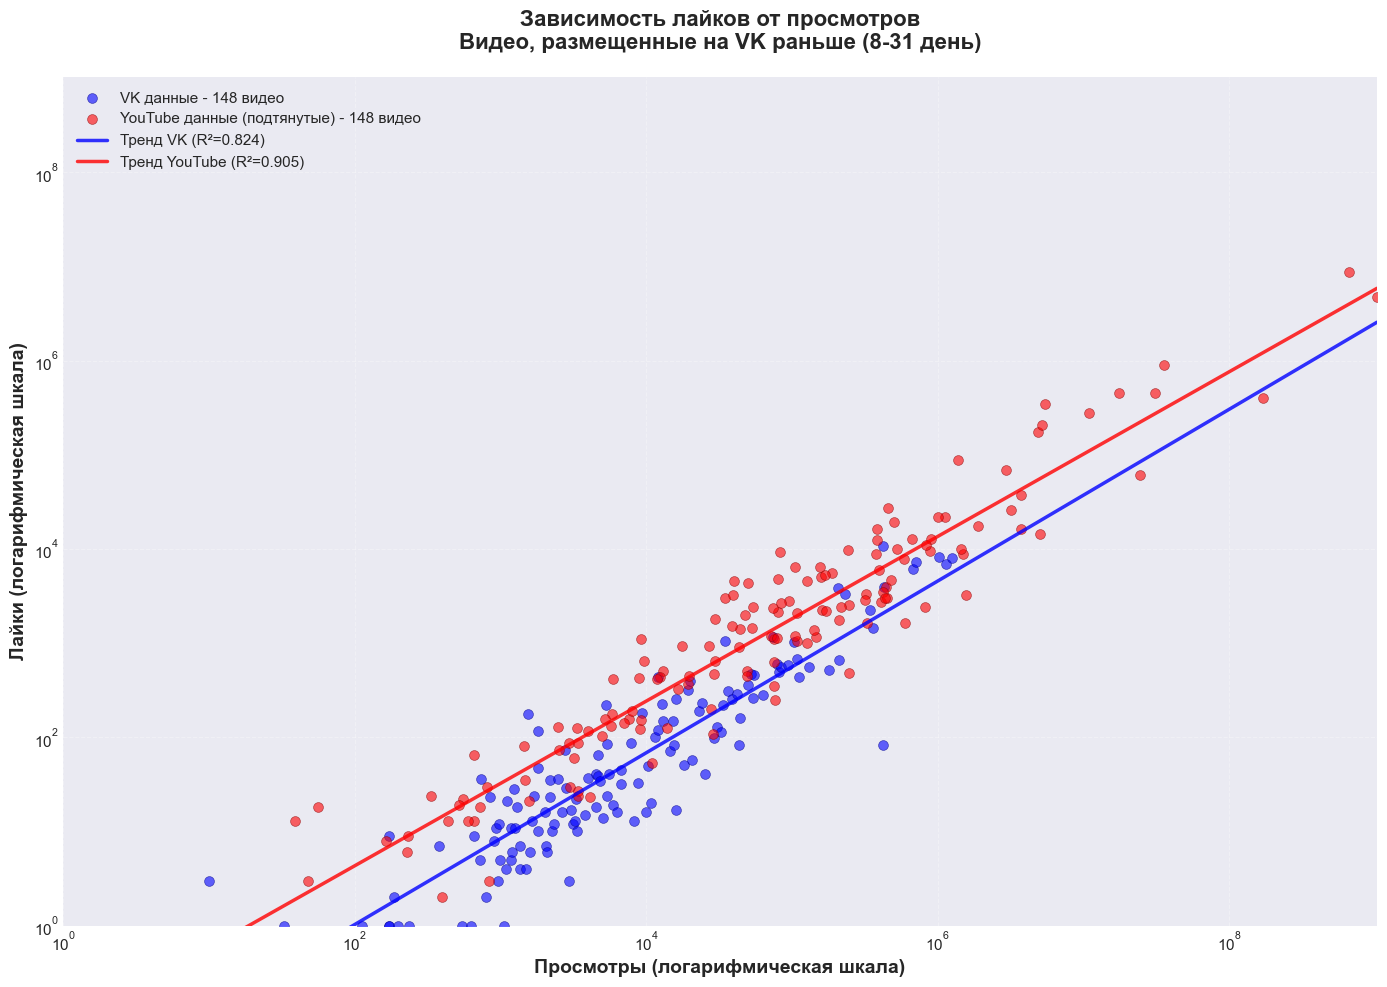

In [41]:
vk_earlier_8_31_vk_views = vk_earlier_8_31['views'].values
vk_earlier_8_31_vk_likes = vk_earlier_8_31['likes'].values
vk_earlier_8_31_yt_views = vk_earlier_8_31['views_youtube'].values
vk_earlier_8_31_yt_likes = vk_earlier_8_31['likes_youtube'].values

all_views_3 = np.concatenate([vk_earlier_8_31_vk_views, vk_earlier_8_31_yt_views])
all_likes_3 = np.concatenate([vk_earlier_8_31_vk_likes, vk_earlier_8_31_yt_likes])

use_log_scale_3 = all_views_3.max() > 1000000 or all_likes_3.max() > 100000

fig3, ax3 = plt.subplots(figsize=(14, 10))

if len(vk_earlier_8_31_vk_views) > 0:
    ax3.scatter(vk_earlier_8_31_vk_views, vk_earlier_8_31_vk_likes, 
               alpha=0.6, s=50, color='blue', 
               label=f'VK данные - {len(vk_earlier_8_31_vk_views)} видео', 
               edgecolors='darkblue', linewidths=0.5)

if len(vk_earlier_8_31_yt_views) > 0:
    ax3.scatter(vk_earlier_8_31_yt_views, vk_earlier_8_31_yt_likes, 
               alpha=0.6, s=50, color='red', 
               label=f'YouTube данные (подтянутые) - {len(vk_earlier_8_31_yt_views)} видео', 
               edgecolors='darkred', linewidths=0.5)

x_min_3, x_max_3 = all_views_3.min(), all_views_3.max()
y_min_3, y_max_3 = all_likes_3.min(), all_likes_3.max()

if use_log_scale_3:
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    log_x_min_3 = np.log10(max(x_min_3, 1))
    log_x_max_3 = np.log10(x_max_3)
    log_y_min_3 = np.log10(max(y_min_3, 1))
    log_y_max_3 = np.log10(y_max_3)
    
    log_min_3 = min(log_x_min_3, log_y_min_3)
    log_max_3 = max(log_x_max_3, log_y_max_3)
    
    x_range_min_3 = 10**log_min_3
    x_range_max_3 = 10**log_max_3
    y_range_min_3 = 10**log_min_3
    y_range_max_3 = 10**log_max_3
else:
    common_min_3 = min(x_min_3, y_min_3)
    common_max_3 = max(x_max_3, y_max_3)
    margin_3 = (common_max_3 - common_min_3) * 0.05
    x_range_min_3 = common_min_3 - margin_3
    x_range_max_3 = common_max_3 + margin_3
    y_range_min_3 = common_min_3 - margin_3
    y_range_max_3 = common_max_3 + margin_3

ax3.set_xlim(x_range_min_3, x_range_max_3)
ax3.set_ylim(y_range_min_3, y_range_max_3)

if len(vk_earlier_8_31_vk_views) > 1:
    if use_log_scale_3:
        valid_mask_vk = (vk_earlier_8_31_vk_views > 0) & (vk_earlier_8_31_vk_likes > 0) & np.isfinite(vk_earlier_8_31_vk_views) & np.isfinite(vk_earlier_8_31_vk_likes)
        vk_views_valid = vk_earlier_8_31_vk_views[valid_mask_vk]
        vk_likes_valid = vk_earlier_8_31_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                log_vk_views = np.log10(vk_views_valid)
                log_vk_likes = np.log10(vk_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_vk_views, log_vk_likes)
                x_line = np.logspace(np.log10(x_range_min_3), np.log10(x_range_max_3), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax3.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_vk = np.isfinite(vk_earlier_8_31_vk_views) & np.isfinite(vk_earlier_8_31_vk_likes)
        vk_views_valid = vk_earlier_8_31_vk_views[valid_mask_vk]
        vk_likes_valid = vk_earlier_8_31_vk_likes[valid_mask_vk]
        
        if len(vk_views_valid) > 1 and np.var(vk_views_valid) > 0 and np.var(vk_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(vk_views_valid, vk_likes_valid)
                x_line = np.linspace(x_range_min_3, x_range_max_3, 100)
                y_line = slope * x_line + intercept
                ax3.plot(x_line, y_line, 'b-', linewidth=2.5,
                        label=f'Тренд VK (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

if len(vk_earlier_8_31_yt_views) > 1:
    if use_log_scale_3:
        valid_mask_yt = (vk_earlier_8_31_yt_views > 0) & (vk_earlier_8_31_yt_likes > 0) & np.isfinite(vk_earlier_8_31_yt_views) & np.isfinite(vk_earlier_8_31_yt_likes)
        yt_views_valid = vk_earlier_8_31_yt_views[valid_mask_yt]
        yt_likes_valid = vk_earlier_8_31_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                log_yt_views = np.log10(yt_views_valid)
                log_yt_likes = np.log10(yt_likes_valid)
                slope, intercept, r_value, _, _ = stats.linregress(log_yt_views, log_yt_likes)
                x_line = np.logspace(np.log10(x_range_min_3), np.log10(x_range_max_3), 100)
                y_line = 10**(slope * np.log10(x_line) + intercept)
                ax3.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass
    else:
        valid_mask_yt = np.isfinite(vk_earlier_8_31_yt_views) & np.isfinite(vk_earlier_8_31_yt_likes)
        yt_views_valid = vk_earlier_8_31_yt_views[valid_mask_yt]
        yt_likes_valid = vk_earlier_8_31_yt_likes[valid_mask_yt]
        
        if len(yt_views_valid) > 1 and np.var(yt_views_valid) > 0 and np.var(yt_likes_valid) > 0:
            try:
                slope, intercept, r_value, _, _ = stats.linregress(yt_views_valid, yt_likes_valid)
                x_line = np.linspace(x_range_min_3, x_range_max_3, 100)
                y_line = slope * x_line + intercept
                ax3.plot(x_line, y_line, 'r-', linewidth=2.5,
                        label=f'Тренд YouTube (R²={r_value**2:.3f})', alpha=0.8)
            except:
                pass

ax3.set_xlabel('Просмотры', fontsize=14, fontweight='bold')
ax3.set_ylabel('Лайки', fontsize=14, fontweight='bold')
ax3.set_title('Зависимость лайков от просмотров\nВидео, размещенные на VK раньше (8-31 день)', 
             fontsize=16, fontweight='bold', pad=20)
ax3.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax3.grid(True, alpha=0.3, linestyle='--')

if use_log_scale_3:
    ax3.set_xlabel('Просмотры (логарифмическая шкала)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Лайки (логарифмическая шкала)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
